<a href="https://colab.research.google.com/github/Dianna22/ML/blob/master/SocialMediaBUZZ/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install parfit
# # !pip install ipdb
# # !pip install --upgrade sklearn
# # !pip install setuptools==40.6.3
# # !apt install cuda
# # !pip install implicit==0.3.8
# !pip install orange3
# # !easy_install -U setuptools

  Stored in directory: /root/.cache/pip/wheels/d9/8a/c9/ed86e85ad0cb41ce2fdcb6bc215902dc475bd3fb1fef7c742d
Successfully built parfit


In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.metrics import f1_score, auc, accuracy_score, confusion_matrix, precision_score, balanced_accuracy_score, recall_score, roc_auc_score, roc_curve
from sklearn import tree, metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


from sklearn.model_selection import ParameterGrid
# import parfit.parfit as pf
from sklearn.svm import *
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


##### Load datasets

In [0]:
PATH_PREFIX = '/content/gdrive/My Drive/ML/'
TWITTER_RELATIVE_500 = PATH_PREFIX + "data/Twitter-Relative-Sigma-500.data"

def load_data(path):
  return pd.DataFrame(pd.read_csv(path))

def load_dataset(path):
	data = pd.read_csv(path)
	return data[data.columns[:-1]], data[data.columns[-1]]

data = load_data(TWITTER_RELATIVE_500)

data_X, data_Y = load_dataset(TWITTER_RELATIVE_500)
data_X = data_X.astype(float)

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=1)
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

In [12]:
skf = StratifiedKFold(10, False, 1)
train_index, test_index = list(skf.split(data_X, data_Y))[0]
X_train, X_test = data_X.iloc[train_index], data_X.iloc[test_index]
y_train, y_test = data_Y.iloc[train_index], data_Y.iloc[test_index]
print(np.shape(X_train))

print(np.shape(X_test))
print(np.shape(y_test))

subset_X = X_test
subset_Y = y_test

skf = StratifiedKFold(10, False, 1)
# X_train, y_test -> 1/10



train_index, test_index = list(skf.split(X_test, y_test))[0]
X_tr, X_tst = X_test.iloc[train_index], X_test.iloc[test_index]
y_tr, y_tst = y_test.iloc[train_index], y_test.iloc[test_index]


subset_train = pd.concat([X_tr, y_tr], axis=1) 
subset_test = pd.concat([X_tst, y_tst], axis=1) 

print(np.shape(subset_train))
print(np.shape(subset_test))


NameError: ignored

In [0]:
print(X_train.describe())
scal = StandardScaler().fit_transform(X_train)
print(pd.DataFrame(scal).describe())
a = normalize(scal)
print(pd.DataFrame(a).describe())

In [0]:
def load_dataset(path):
	data = pd.read_csv(path)
	return data[data.columns[:-1]], data[data.columns[-1]]

In [0]:
data_X, data_Y = load_dataset(TWITTER_RELATIVE_500)
data_X = data_X.astype(float)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=1)
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

In [0]:
# TWITTER_TRAIN = PATH_PREFIX + "data/train_500"
# TWITTER_TEST = PATH_PREFIX + "data/test_500"
# TWITTER_VAL = PATH_PREFIX + "data/val_500"

In [0]:
# print(np.shape(data_X))

(140707, 77)


In [0]:
# X_train, Y_train = load_dataset(TWITTER_TRAIN)
# X_val, Y_val = load_dataset(TWITTER_VAL)
# X_test, Y_test = load_dataset(TWITTER_TEST)

In [0]:
# print(Y_train.value_counts()[0]/Y_train.value_counts()[1])
# print(Y_val.value_counts()[0]/Y_val.value_counts()[1])
# print(Y_test.value_counts()[0]/Y_test.value_counts()[1])

37.076955602537
38.15304347826087
40.38529411764706


#### Normalization

##### Min-max normalization



```
# TODO normalization per feature vector (11)
```


In [0]:
norm_X_train = normalize(X_train, axis=0, norm='max')
norm_X_val = normalize(X_val, axis=0, norm='max')
norm_X_test = normalize(X_test, axis=0, norm='max')

In [0]:
pd.DataFrame(X_train).describe()

,Unnamed: 0,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,...,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
count,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.00000,90052.000000,90052.000000,90052.000000,...,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000
mean,70314.643695,171.771998,154.786135,164.797495,176.272021,186.467341,215.67742,243.088116,87.067872,78.694277,...,1.038297,1.110372,1.193454,172.330409,155.265746,165.268811,176.761749,186.993370,216.244992,243.701006
std,40590.715924,506.384320,468.363139,488.062360,522.865411,552.952547,626.37990,693.477620,235.195493,217.696152,...,1.314246,1.302927,1.583025,507.476487,469.249856,488.921779,523.796168,553.953944,627.412913,694.531571
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35112.750000,3.000000,2.000000,3.000000,3.000000,3.000000,4.00000,6.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000
50%,70403.500000,22.000000,19.000000,21.000000,22.000000,23.000000,28.00000,33.000000,13.000000,11.000000,...,1.000000,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,29.000000,33.000000
75%,105457.250000,125.000000,112.000000,119.000000,126.000000,133.000000,161.00000,186.000000,70.000000,64.000000,...,1.083333,1.100021,1.118081,125.000000,113.000000,120.000000,126.000000,133.000000,162.000000,187.000000
max,140706.000000,24210.000000,22899.000000,20015.000000,27007.000000,30957.000000,28603.00000,27449.000000,10170.000000,10036.000000,...,273.000000,181.000000,239.000000,24301.000000,22980.000000,20083.000000,27071.000000,31028.000000,28697.000000,27557.000000


In [0]:
pd.DataFrame(norm_X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,...,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000,90052.000000
mean,0.499727,0.007095,0.006760,0.008234,0.006527,0.006023,0.007540,0.008856,0.008561,0.007841,...,0.003803,0.006135,0.004994,0.007091,0.006757,0.008229,0.006530,0.006027,0.007535,0.008844
std,0.288479,0.020916,0.020453,0.024385,0.019360,0.017862,0.021899,0.025264,0.023126,0.021692,...,0.004814,0.007198,0.006624,0.020883,0.020420,0.024345,0.019349,0.017853,0.021863,0.025203
min,0.000021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249547,0.000124,0.000087,0.000150,0.000111,0.000097,0.000140,0.000219,0.000197,0.000199,...,0.003663,0.005525,0.004184,0.000123,0.000087,0.000149,0.000111,0.000097,0.000139,0.000218
50%,0.500359,0.000909,0.000830,0.001049,0.000815,0.000743,0.000979,0.001202,0.001278,0.001096,...,0.003663,0.005525,0.004184,0.000905,0.000827,0.001046,0.000813,0.000741,0.001011,0.001198
75%,0.749487,0.005163,0.004891,0.005946,0.004665,0.004296,0.005629,0.006776,0.006883,0.006377,...,0.003968,0.006077,0.004678,0.005144,0.004917,0.005975,0.004654,0.004286,0.005645,0.006786
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### ROC curve


In [0]:
def plot_roc_curve(true_Y, scores, title = "ROC curve"):
  plt.figure()
  for i in range(np.shape(true_Y)[0]):
    Y = true_Y[i]
    pred = scores[i]
    fpr, tpr, _ = roc_curve(Y, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,
               lw=2, label='ROC curve (weighted_area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title)
  plt.legend()
  plt.show()

# Model construction

In [0]:
stratified_kfold = KFold(10, False, 1)
# kfold = 

In [7]:
min_data = min(data_X.min())
max_data = max(data_X.max())
max_data

37505.0

In [0]:
def scale_data_standard(train, test):
#   scaler = MinMaxScaler((min_data, max_data))
  scaler = StandardScaler()
  scaler.fit(train)
  return scaler.transform(train), scaler.transform(test)

In [0]:
def scale_data_robust(train, test):
#   scaler = MinMaxScaler((min_data, max_data))
  scaler = RobustScaler()
  scaler.fit(train)
  return scaler.transform(train), scaler.transform(test)

In [0]:
def scale_data_minmax(train, test):
  scaler = MinMaxScaler((min_data, max_data))
#   scaler = StandardScaler()
  scaler.fit(train)
  return scaler.transform(train), scaler.transform(test)

In [0]:
def feature_selection(train, test, comp):
    pca = PCA(n_components=comp)
#     pca = PCA(0.95) -> 17 components
    pca = pca.fit(train)
    print((pca.components_).shape[0])

    return pca.transform(train), pca.transform(test)

In [0]:
def test_results(model_builder_fct, scaler, feature_selection, comp, norm, data_X, data_Y, model_name):
#   ipdb.set_trace(context=10)
  results = pd.DataFrame(index=range(10))
  col_name = f"{model_name}_stratified_kfold_%s"
  predictions, Y = [], []
  f1s, w_aucs, bacc, tpr, tnr, prec = [], [], [], [], [], []
  for train_idx, test_idx in stratified_kfold.split(data_X):
    print("Fold %s" % str(len(f1s)))
    train_X = data_X.iloc[train_idx]
    test_X = data_X.iloc[test_idx]
    train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
    
    if norm:
      train_X, test_X = normalize(train_X, norm=norm), normalize(test_X, norm=norm)
    if scaler:
      train_X, test_X = scaler(train_X, test_X)
    if feature_selection:
      train_X, test_X = feature_selection(train_X, test_X, comp)
    model = model_builder_fct(train_X, train_Y)
    print("Model fit")
    pred = model.predict(test_X)
    predictions.append(pred)
    Y.append(test_Y)
#     pred_Y = np.asarray(np.clip(pred,0,1)).round()
    pred_Y = model.predict(test_X)
#     print(sum(pred_Y))

#     pred_Y = np.vectorize(lambda x: 0 if x < 0.5 else 1)(pred_Y)
    f1s.append(f1_score(test_Y, pred_Y))
    w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
    tn, fp, fn, tp = confusion_matrix(test_Y, pred_Y).ravel()
    bacc.append(balanced_accuracy_score(test_Y, pred_Y))
    tpr.append(tp/(tp+fn))
    tnr.append(tn/(fp+tn))
#     assert tpr == recall_score(test_Y, pred_Y)
    prec.append(precision_score(test_Y, pred_Y))
    
  f1_df = pd.DataFrame({col_name % ("F1"): f1s})
  auc_df = pd.DataFrame({col_name % ("AUC"): w_aucs})
  bacc_df = pd.DataFrame({col_name % ("BACC"): bacc})
  tpr_df = pd.DataFrame({col_name % ("TPR(recall)"): tpr})
  tnr_df = pd.DataFrame({col_name % ("TNR"): tnr})
  prec = pd.DataFrame({col_name % ("Precision"): prec})
  results = pd.concat([results, f1_df, auc_df, bacc_df, tpr_df, tnr_df, prec], axis=1)
  return results, (Y, predictions)

## Linear classifier

In [0]:
from sklearn import linear_model

In [0]:
# X_train[:3]
sum(Y_test)

680.0

In [0]:
pd.DataFrame(normalize(X_train[:3], axis=0, norm='l2'))

#### Logistic regression

In [0]:
results = test_results(model_builder_logistic_reg, linear_model.LogisticRegression, data_X, data_Y, "logisticreg_denorm_opt")
results

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


196.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


73.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


73.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


77.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


66.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


84.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


114.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


98.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


59.0


,logisticreg_denorm_opt_stratified_kfold_F1,logisticreg_denorm_opt_stratified_kfold_AUC,logisticreg_denorm_opt_stratified_kfold_BACC,logisticreg_denorm_opt_stratified_kfold_TPR,logisticreg_denorm_opt_stratified_kfold_TNR
0,0.479245,0.687608,0.687608,0.380240,0.994977
1,0.342723,0.605236,0.605236,0.210983,0.999490
2,0.282051,0.586096,0.586096,0.173502,0.998691
3,0.247664,0.573919,0.573919,0.149296,0.998542
4,0.311927,0.594379,0.594379,0.189415,0.999344
5,0.283582,0.584494,0.584494,0.169643,0.999345
6,0.281124,0.584029,0.584029,0.169082,0.998975
7,0.387879,0.625327,0.625327,0.251969,0.998685
8,0.296748,0.591726,0.591726,0.185279,0.998172
9,0.216704,0.562098,0.562098,0.125000,0.999196


##### Logistic regression denorm

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:  2.2min remaining:   43.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  2.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.2s finished


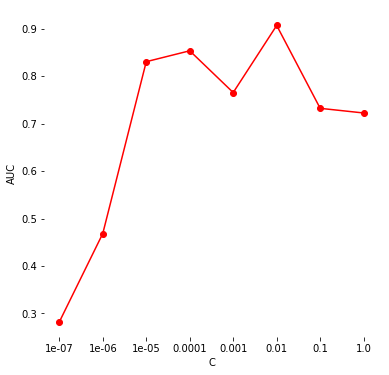

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False) 0.9067495352515191


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import ParameterGrid
import parfit.parfit as pf
grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(LogisticRegression, paramGrid,
           X_train, Y_train, X_val, Y_val, 
           metric = roc_auc_score,
           greater_is_better=True,
           scoreLabel = "AUC")
print(bestModel, bestScore)

In [0]:
results = test_results(model_builder, linear_model.LogisticRegression, data_X, data_Y, "logisticreg_denorm")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


54.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


173.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


75.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


89.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


74.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


95.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


128.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


72.0
70.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
results

,linreg_norm_max_stratified_kfold_F1,linreg_norm_max_stratified_kfold_AUC,linreg_norm_max_stratified_kfold_BACC,linreg_norm_max_stratified_kfold_TPR,linreg_norm_max_stratified_kfold_TNR
0,0.231959,0.567038,0.567038,0.134731,0.999345
1,0.466281,0.672961,0.672961,0.349711,0.996211
2,0.290816,0.589251,0.589251,0.179811,0.998691
3,0.267281,0.580925,0.580925,0.163380,0.998469
4,0.330357,0.602517,0.602517,0.206128,0.998906
5,0.287805,0.587252,0.587252,0.175595,0.998908
6,0.290766,0.588603,0.588603,0.178744,0.998462
7,0.381139,0.626164,0.626164,0.254593,0.997735
8,0.244635,0.571787,0.571787,0.144670,0.998903
9,0.229075,0.567051,0.567051,0.135417,0.998685


##### Logistic regression - max norm

In [0]:
results = test_results(model_builder, linear_model.LogisticRegression, pd.DataFrame(normalize(data_X, axis=0, norm='max')), data_Y, "logisticreg_norm_max")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


116.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


123.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


88.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


138.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


119.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


118.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


119.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


121.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


120.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


106.0


In [0]:
results

,logisticreg_norm_max_stratified_kfold_F1,logisticreg_norm_max_stratified_kfold_AUC,logisticreg_norm_max_stratified_kfold_BACC,logisticreg_norm_max_stratified_kfold_TPR,logisticreg_norm_max_stratified_kfold_TNR
0,0.351111,0.616917,0.616917,0.236527,0.997307
1,0.358209,0.619967,0.619967,0.242775,0.997158
2,0.281481,0.588778,0.588778,0.179811,0.997746
3,0.332657,0.613452,0.613452,0.230986,0.995917
4,0.347280,0.614286,0.614286,0.231198,0.997375
5,0.343612,0.614615,0.614615,0.232143,0.997088
6,0.311445,0.598924,0.598924,0.200483,0.997364
7,0.302789,0.598094,0.598094,0.199475,0.996713
8,0.322957,0.603977,0.603977,0.210660,0.997295
9,0.240816,0.575106,0.575106,0.153646,0.996566


##### Logistic regression - L2 norm

In [0]:
results = test_results(model_builder, linear_model.LogisticRegression, pd.DataFrame(normalize(data_X, axis=0, norm='l2')), data_Y, "logisticreg_norm_l2")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


46.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


60.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


46.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


70.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


56.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


67.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


54.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


59.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


68.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


55.0


In [0]:
results

,logisticreg_norm_l2_stratified_kfold_F1,logisticreg_norm_l2_stratified_kfold_AUC,logisticreg_norm_l2_stratified_kfold_BACC,logisticreg_norm_l2_stratified_kfold_TPR,logisticreg_norm_l2_stratified_kfold_TNR
0,0.152632,0.542794,0.542794,0.086826,0.998762
1,0.211823,0.561519,0.561519,0.124277,0.998761
2,0.187328,0.553192,0.553192,0.107256,0.999128
3,0.197647,0.558134,0.558134,0.118310,0.997959
4,0.173494,0.549410,0.549410,0.100279,0.998541
5,0.233251,0.569212,0.569212,0.139881,0.998544
6,0.188034,0.552774,0.552774,0.106280,0.999268
7,0.159091,0.545055,0.545055,0.091864,0.998247
8,0.207792,0.560182,0.560182,0.121827,0.998538
9,0.141230,0.539488,0.539488,0.080729,0.998246


In [0]:
results = test_results(model_builder, linear_model.LogisticRegression, pd.DataFrame(normalize(data_X, axis=1, norm='l2')), data_Y, "logisticreg_norm_l2")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
results

,logisticreg_norm_l2_stratified_kfold_F1,logisticreg_norm_l2_stratified_kfold_AUC,logisticreg_norm_l2_stratified_kfold_BACC,logisticreg_norm_l2_stratified_kfold_TPR,logisticreg_norm_l2_stratified_kfold_TNR
0,0.0,0.5,0.5,0.0,1.0
1,0.0,0.5,0.5,0.0,1.0
2,0.0,0.5,0.5,0.0,1.0
3,0.0,0.5,0.5,0.0,1.0
4,0.0,0.5,0.5,0.0,1.0
5,0.0,0.5,0.5,0.0,1.0
6,0.0,0.5,0.5,0.0,1.0
7,0.0,0.5,0.5,0.0,1.0
8,0.0,0.5,0.5,0.0,1.0
9,0.0,0.5,0.5,0.0,1.0


##### Logistic regr - l1 norm

In [0]:
results = test_results(model_builder, linear_model.LogisticRegression, pd.DataFrame(normalize(data_X, axis=0, norm='l1')), data_Y, "logisticreg_norm_l1")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
results

,logisticreg_norm_l1_stratified_kfold_F1,logisticreg_norm_l1_stratified_kfold_AUC,logisticreg_norm_l1_stratified_kfold_BACC,logisticreg_norm_l1_stratified_kfold_TPR,logisticreg_norm_l1_stratified_kfold_TNR
0,0.0,0.5,0.5,0.0,1.0
1,0.0,0.5,0.5,0.0,1.0
2,0.0,0.5,0.5,0.0,1.0
3,0.0,0.5,0.5,0.0,1.0
4,0.0,0.5,0.5,0.0,1.0
5,0.0,0.5,0.5,0.0,1.0
6,0.0,0.5,0.5,0.0,1.0
7,0.0,0.5,0.5,0.0,1.0
8,0.0,0.5,0.5,0.0,1.0
9,0.0,0.5,0.5,0.0,1.0


#### SGDClassifier

In [0]:
model = linear_model.SGDClassifier()
model = model.fit(train_X, train_Y)
predicts = model.predict(test_X)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [0]:
def build_sgd(train, test):
  model = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
      early_stopping=True, epsilon=0.1, eta0=0.001, fit_intercept=True,
      l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
      max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
      penalty='none', power_t=0.5, random_state=None, shuffle=True,
      tol=0.0001, validation_fraction=0.2, verbose=0, warm_start=False)# 0.48384879725085916
  return model.fit(train, test)

40.0

In [0]:
sgd_results_scaled, (y, pred) = test_results(build_log_regr, scale_data_standard, None, None, data_X, data_Y, "SGDStandardSC")

In [0]:
sgd_results_scaled.describe().iloc[1]

##### denorm

In [0]:
results = test_results(model_builder, linear_model.SGDClassifier, data_X, data_Y, "SGD_denorm")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


932.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


14.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


202.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


482.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


684.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


2338.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


51.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


1028.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


392.0


In [0]:
results

,SGD_denorm_stratified_kfold_F1,SGD_denorm_stratified_kfold_AUC,SGD_denorm_stratified_kfold_BACC,SGD_denorm_stratified_kfold_TPR,SGD_denorm_stratified_kfold_TNR
0,0.282780,0.740556,0.740556,0.535928,0.945185
1,0.016667,0.503935,0.503935,0.008671,0.999199
2,0.277457,0.608839,0.608839,0.227129,0.990548
3,0.145759,0.570568,0.570568,0.171831,0.969306
4,0.306807,0.703734,0.703734,0.445682,0.961785
5,0.000000,0.500000,0.500000,0.000000,1.000000
6,0.237645,0.821302,0.821302,0.789855,0.852750
7,0.064815,0.517021,0.517021,0.036745,0.997297
8,0.309423,0.749647,0.749647,0.558376,0.940918
9,0.280928,0.631588,0.631588,0.283854,0.979322


##### max norm

In [0]:
results = test_results(model_builder, linear_model.SGDClassifier, pd.DataFrame(normalize(data_X, axis=0, norm='max')), data_Y, "SGD_norm_max")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


35.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


51.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


25.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


70.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


51.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


51.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


21.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


52.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


28.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


38.0


In [0]:
results

,SGD_norm_max_stratified_kfold_F1,SGD_norm_max_stratified_kfold_AUC,SGD_norm_max_stratified_kfold_BACC,SGD_norm_max_stratified_kfold_TPR,SGD_norm_max_stratified_kfold_TNR
0,0.168022,0.546262,0.546262,0.092814,0.999709
1,0.206549,0.558884,0.558884,0.118497,0.999271
2,0.116959,0.531364,0.531364,0.063091,0.999636
3,0.202353,0.559579,0.559579,0.121127,0.998031
4,0.170732,0.548163,0.548163,0.097493,0.998833
5,0.196382,0.556074,0.556074,0.113095,0.999054
6,0.091954,0.524118,0.524118,0.048309,0.999927
7,0.175520,0.549357,0.549357,0.099738,0.998977
8,0.109005,0.529005,0.529005,0.058376,0.999634
9,0.123223,0.533416,0.533416,0.067708,0.999123


In [0]:
results = test_results(model_builder, linear_model.SGDClassifier, pd.DataFrame(normalize(data_X, axis=0, norm='max')), data_Y, "SGD_norm_max")

#### Linear regression

##### Sth else

In [0]:
linreg = linear_model.LinearRegression()
linreg = linreg.fit(pd.DataFrame(normalize(X_train, axis=0, norm='max')),Y_train)

In [0]:
res_norm_max=test_results(linreg, pd.DataFrame(normalize(X_test, axis=0, norm='max')), Y_test, "LinReg_norm_max")
res_norm_max.describe()

,LinReg_norm_l1_stratified_kfold_F1,LinReg_norm_l1_stratified_kfold_AUC,LinReg_norm_l1_stratified_kfold_BACC,LinReg_norm_l1_stratified_kfold_TPR,LinReg_norm_l1_stratified_kfold_TNR
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.480670,0.856842,0.856842,0.747221,0.966463
std,0.040252,0.030014,0.030014,0.060378,0.004174
min,0.428571,0.810061,0.810061,0.649351,0.958500
25%,0.444493,0.845157,0.845157,0.722018,0.965314
50%,0.483304,0.853661,0.853661,0.745086,0.966910
75%,0.511423,0.878232,0.878232,0.790310,0.968770
max,0.539823,0.906239,0.906239,0.843750,0.972031


In [0]:
res_norm_l2=test_results(linreg, pd.DataFrame(normalize(X_test, axis=0, norm='l2')), Y_test, "LinReg_norm_l2")
res_norm_l2.describe()

,LinReg_norm_l2_stratified_kfold_F1,LinReg_norm_l2_stratified_kfold_AUC,LinReg_norm_l2_stratified_kfold_BACC,LinReg_norm_l2_stratified_kfold_TPR,LinReg_norm_l2_stratified_kfold_TNR
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.528450,0.713853,0.713853,0.432550,0.995157
std,0.043086,0.031635,0.031635,0.064281,0.001373
min,0.457627,0.672767,0.672767,0.350649,0.992740
25%,0.497905,0.689216,0.689216,0.381885,0.994056
50%,0.526988,0.706097,0.706097,0.416013,0.995806
75%,0.569876,0.734115,0.734115,0.473895,0.996003
max,0.581197,0.763037,0.763037,0.533333,0.996734


In [0]:
# res_norm=test_results(linreg, X_test_norm, Y_test, "LinReg_norm")
res_norm.describe()

,LinReg_norm_stratified_kfold_F1,LinReg_norm_stratified_kfold_AUC,LinReg_norm_stratified_kfold_BACC,LinReg_norm_stratified_kfold_TPR,LinReg_norm_stratified_kfold_TNR
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.270962,0.580359,0.580359,0.161375,0.999344
std,0.041672,0.014359,0.014359,0.028808,0.000591
min,0.209302,0.558442,0.558442,0.116883,0.998536
25%,0.245658,0.572551,0.572551,0.146196,0.998905
50%,0.260870,0.577058,0.577058,0.154845,0.999455
75%,0.309033,0.592156,0.592156,0.184585,0.999909
max,0.330097,0.602927,0.602927,0.207317,1.000000


In [0]:
# res=test_results(linreg, X_test, Y_test, "LinReg_denorm")
res.describe()

,LinReg_denorm_stratified_kfold_F1,LinReg_denorm_stratified_kfold_AUC,LinReg_denorm_stratified_kfold_BACC,LinReg_denorm_stratified_kfold_TPR,LinReg_denorm_stratified_kfold_TNR
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.311492,0.595059,0.595059,0.190810,0.999308
std,0.059002,0.020347,0.020347,0.040640,0.000401
min,0.181818,0.551400,0.551400,0.103896,0.998902
25%,0.302922,0.592214,0.592214,0.185337,0.998909
50%,0.330213,0.600855,0.600855,0.202257,0.999272
75%,0.347154,0.608196,0.608196,0.217210,0.999636
max,0.365854,0.615305,0.615305,0.231707,1.000000


In [0]:
reg = linear_model.LogisticRegression()
reg = reg.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0
1.0
0
0.6830546594866918


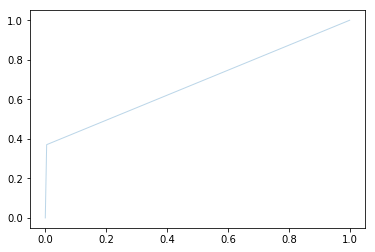

In [0]:
predicts = reg.predict(X_test)
np.absolute(np.asarray(predicts).round())
print(np.min(predicts))
print(np.max(predicts))
print(len([i for i in predicts if i >1.5]))
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predicts)
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label="ROC")
plt.show()

In [0]:
res=test_results(reg, X_test, Y_test, "LogReg_denorm")
res

1
2
3
4
5
6
7
8
9
10


,LReg_denorm_stratified_kfold_F1,LReg_denorm_stratified_kfold_AUC,LReg_denorm_stratified_kfold_BACC,LReg_denorm_stratified_kfold_TPR,LReg_denorm_stratified_kfold_TNR
0,0.515625,0.698841,0.698841,0.402439,0.995243
1,0.533333,0.730248,0.730248,0.466667,0.993829
2,0.500000,0.694723,0.694723,0.393443,0.996004
3,0.446602,0.669276,0.669276,0.343284,0.995268
4,0.500000,0.692430,0.692430,0.389610,0.995250
5,0.458333,0.670057,0.670057,0.343750,0.996364
6,0.454545,0.670600,0.670600,0.344828,0.996372
7,0.509434,0.705146,0.705146,0.415385,0.994907
8,0.475248,0.672456,0.672456,0.347826,0.997086
9,0.375000,0.633806,0.633806,0.272727,0.994885


### SVM

In [0]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

In [0]:
svc = LinearSVC()
# svc = svc.fit(normalize(X_train, axis=0, norm='max'), Y_train)
svc = svc.fit(X_train, Y_train)

NameError: ignored

In [0]:
# pred_Y = svc.predict(normalize(X_test, axis=0, norm='max'))
pred_Y = svc.predict(X_test)

##### Model selection

In [0]:
X_train, X_test = scale_data(X_train, X_test) #standard scaler
X_train, X_test = feature_selection(X_train, X_test)
from sklearn.model_selection import ParameterGrid
import parfit.parfit as pf
grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0,10],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced'],
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [1000, 5000],
    'tol' : [1e-4, 1e-5, 1e-6, 1e-3, 1e-2]
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(LinearSVC, paramGrid,
           X_train, Y_train, X_test, Y_test, 
           metric = f1_score,
           greater_is_better=True,
           scoreLabel = "F1")
print(bestModel, bestScore)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

-------------SCORING MODELS-------------
Too many dimensions to plot.
LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=1e-05, verbose=0) 0.35981138919114974


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.6s finished


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 10.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.5s finished


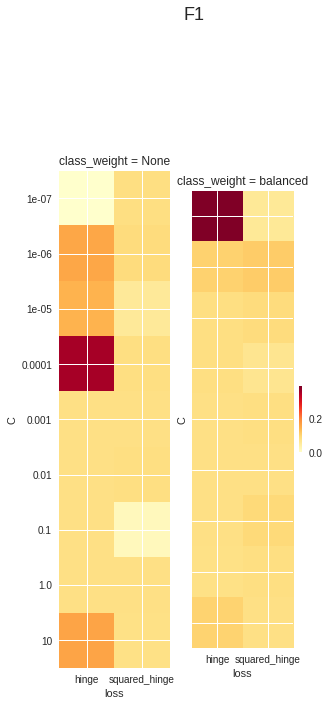

LinearSVC(C=1e-07, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0) 0.39123102866779086


In [0]:
X_train, X_test = scale_data(X_train, X_test)
# X_train, X_test = feature_selection(X_train, X_test)
from sklearn.model_selection import ParameterGrid
import parfit.parfit as pf
grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0,10],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced'],
    'loss': ['hinge', 'squared_hinge']
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(LinearSVC, paramGrid,
           X_train, Y_train, X_test, Y_test, 
           metric = f1_score,
           greater_is_better=True,
           scoreLabel = "F1")
print(bestModel, bestScore)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1908s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1652s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.4s finished


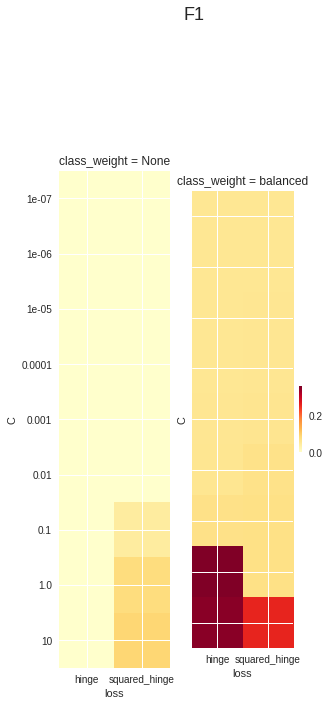

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0) 0.3591040462427746


In [0]:
X_train, X_test = scale_data(X_train, X_test)
X_train, X_test = feature_selection(X_train, X_test)
from sklearn.model_selection import ParameterGrid
import parfit.parfit as pf
grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0,10],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced'],
    'loss': ['hinge', 'squared_hinge']
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(LinearSVC, paramGrid,
           X_train, Y_train, X_test, Y_test, 
           metric = f1_score,
           greater_is_better=True,
           scoreLabel = "F1")
print(bestModel, bestScore)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 28.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished


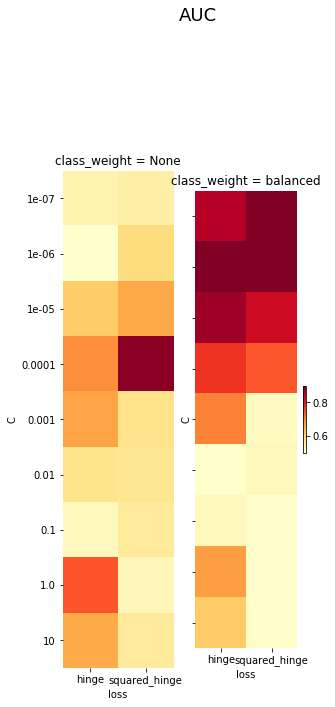

LinearSVC(C=1e-06, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0) 0.8969396362079695


In [0]:
from sklearn.model_selection import ParameterGrid
import parfit.parfit as pf
grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0,10],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced'],
    'loss': ['hinge', 'squared_hinge']
}
grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0,10],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced'],
    'loss': ['hinge', 'squared_hinge']
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(LinearSVC, paramGrid,
           X_train, Y_train, X_val, Y_val, 
           metric = roc_auc_score,
           greater_is_better=True,
           scoreLabel = "AUC")
print(bestModel, bestScore)

##### Model evaluation

In [0]:
def build_svm(X,Y):
#   model = LinearSVC(C=1e-06, class_weight=None, dual=True, fit_intercept=True,
#      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
#      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
#      verbose=0)
# LinearSVC(C=1e-07, class_weight='balanced', dual=True, fit_intercept=True,
#      intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
#      penalty='l2', random_state=None, tol=0.0001, verbose=0) - best 0.39
#   model = LinearSVC(C=1e-07, class_weight='balanced', dual=True, fit_intercept=True,
#      intercept_scaling=1, loss='hinge', max_iter=2500, multi_class='ovr',
#      penalty='l2', random_state=None, tol=0.0001, verbose=0)
#   model = LinearSVC(C=10, class_weight='balanced', dual=True, fit_intercept=True,
#      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
#      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
#      verbose=0)
  model = LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=1e-05, verbose=0)
  return model.fit(X,Y)

In [0]:
linscv_results_scaled, (y, pred) = test_results(build_svm, scale_data, feature_selection, data_X, data_Y, "LinSVC") # robust scaler + pca

Fold 0
Model fit
Fold 1
Model fit
Fold 2
Model fit
Fold 3
Model fit
Fold 4
Model fit
Fold 5
Model fit
Fold 6
Model fit
Fold 7
Model fit
Fold 8
Model fit
Fold 9
Model fit


In [0]:
linscv_results_scaled.describe().iloc[1] # robust + pca

LinSVC_stratified_kfold_F1             0.015152
LinSVC_stratified_kfold_AUC            0.518303
LinSVC_stratified_kfold_BACC           0.518303
LinSVC_stratified_kfold_TPR(recall)    0.193437
LinSVC_stratified_kfold_TNR            0.843170
LinSVC_stratified_kfold_Precision      0.008327
Name: mean, dtype: float64

In [0]:
linscv_results_scaled.describe().iloc[1] # standard + pca

LinSVC_stratified_kfold_F1             0.314014
LinSVC_stratified_kfold_AUC            0.888764
LinSVC_stratified_kfold_BACC           0.888764
LinSVC_stratified_kfold_TPR(recall)    0.875909
LinSVC_stratified_kfold_TNR            0.901618
LinSVC_stratified_kfold_Precision      0.191530
Name: mean, dtype: float64

In [0]:
linscv_results_scaled.describe().iloc[1] # standard + pca

LinSVC_stratified_kfold_F1             0.366148
LinSVC_stratified_kfold_AUC            0.686265
LinSVC_stratified_kfold_BACC           0.686265
LinSVC_stratified_kfold_TPR(recall)    0.391111
LinSVC_stratified_kfold_TNR            0.981418
LinSVC_stratified_kfold_Precision      0.392707
Name: mean, dtype: float64

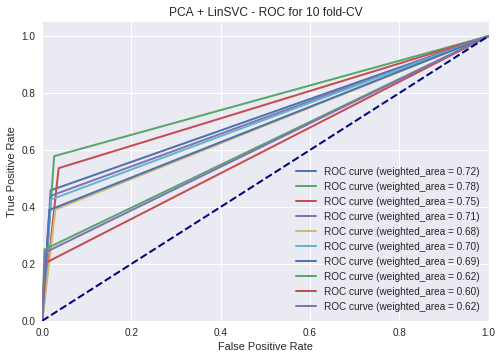

In [0]:
plot_roc_curve(y, pred, "PCA + LinSVC - ROC for 10 fold-CV")  # standard + pca

In [0]:
linscv_results_scaled.describe().iloc[1] # 0, 37505 + fs

LinSVC_stratified_kfold_F1             0.060033
LinSVC_stratified_kfold_AUC            0.582786
LinSVC_stratified_kfold_BACC           0.582786
LinSVC_stratified_kfold_TPR(recall)    0.949431
LinSVC_stratified_kfold_TNR            0.216141
LinSVC_stratified_kfold_Precision      0.031004
Name: mean, dtype: float64

In [0]:
linscv_results_scaled.describe().iloc[1] # 0, 37505

LinSVC_stratified_kfold_F1             0.473080
LinSVC_stratified_kfold_AUC            0.676131
LinSVC_stratified_kfold_BACC           0.676131
LinSVC_stratified_kfold_TPR(recall)    0.356028
LinSVC_stratified_kfold_TNR            0.996234
LinSVC_stratified_kfold_Precision      0.731774
Name: mean, dtype: float64

In [0]:
print(sum(pred[0]))

221.0


In [0]:
print(sum(y[0]))

406.0


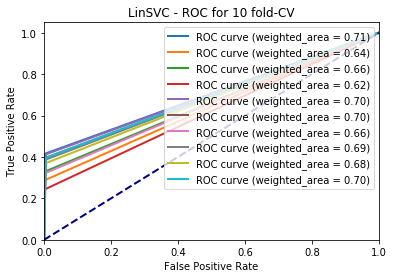

In [0]:
plot_roc_curve(y, pred, "LinSVC - ROC for 10 fold-CV")  # min max

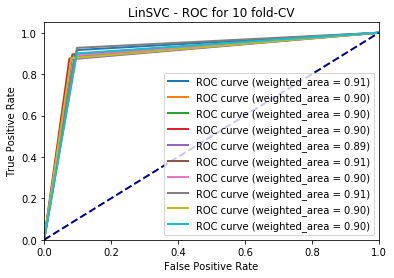

In [0]:
plot_roc_curve(y, pred, "LinSVC - ROC for 10 fold-CV")  # unweithed roc -300,300

In [0]:
linscv_results_scaled.describe().iloc[1] # minmax scalling ROC -300 300 unweighted

LinSVC_stratified_kfold_F1             0.337539
LinSVC_stratified_kfold_AUC            0.901735
LinSVC_stratified_kfold_BACC           0.901735
LinSVC_stratified_kfold_TPR(recall)    0.893259
LinSVC_stratified_kfold_TNR            0.910210
LinSVC_stratified_kfold_Precision      0.208153
Name: mean, dtype: float64

In [0]:
# linscv_results_scaled, (y, pred) = test_results(build_svm, scale_data, data_X, data_Y, "LinSVC")

Fold 0


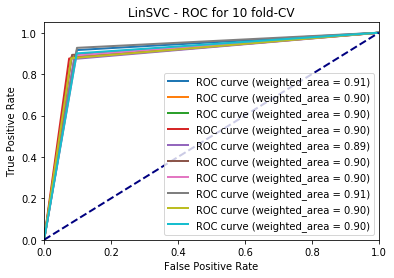

In [0]:
plot_roc_curve(y, pred, "LinSVC - ROC for 10 fold-CV") 

In [0]:
linscv_results_scaled.describe().iloc[1] # minmax scalling ROC -300 300 weighted

LinSVC_stratified_kfold_F1             0.338376
LinSVC_stratified_kfold_AUC            0.901529
LinSVC_stratified_kfold_BACC           0.901529
LinSVC_stratified_kfold_TPR(recall)    0.892426
LinSVC_stratified_kfold_TNR            0.910633
LinSVC_stratified_kfold_Precision      0.208842
Name: mean, dtype: float64

In [0]:
scaler = RobustScaler()
scaler.fit(X_train)
t = scaler.transform(X_test)
print(pd.DataFrame(X_test).describe())

              NCD_0         NCD_1         NCD_2         NCD_3         NCD_4  \
count  28142.000000  28142.000000  28142.000000  28142.000000  28142.000000   
mean     171.335833    153.233494    163.667863    175.557992    185.457892   
std      501.044901    454.150673    488.723672    511.127411    547.371474   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      2.000000      3.000000      3.000000      3.000000   
50%       21.000000     18.000000     20.000000     22.000000     23.000000   
75%      125.000000    112.000000    119.000000    128.000000    134.000000   
max    20179.000000  14573.000000  15582.000000  15727.000000  16191.000000   

              NCD_5         NCD_6          AI_0          AI_1          AI_2  \
count  28142.000000  28142.000000  28142.000000  28142.000000  28142.000000   
mean     215.079419    243.365077     85.992147     77.195437     82.603404   
std      615.533820    715.133084    216.936461    

In [0]:
linscv_results_scaled.describe().iloc[1] # Robust scaler

LinSVC_stratified_kfold_F1             0.147954
LinSVC_stratified_kfold_AUC            0.834968
LinSVC_stratified_kfold_BACC           0.834968
LinSVC_stratified_kfold_TPR(recall)    0.961238
LinSVC_stratified_kfold_TNR            0.708697
LinSVC_stratified_kfold_Precision      0.080182
Name: mean, dtype: float64

In [0]:
linscv_results_scaled.describe().iloc[1] # Standard scaler

LinSVC_stratified_kfold_F1             0.337404
LinSVC_stratified_kfold_AUC            0.898048
LinSVC_stratified_kfold_BACC           0.898048
LinSVC_stratified_kfold_TPR(recall)    0.884865
LinSVC_stratified_kfold_TNR            0.911232
LinSVC_stratified_kfold_Precision      0.208517
Name: mean, dtype: float64

In [0]:
linscv_results_scaled.describe().iloc[1] # norm minmax 0 400

LinSVC_stratified_kfold_F1             0.337491
LinSVC_stratified_kfold_AUC            0.898187
LinSVC_stratified_kfold_BACC           0.898187
LinSVC_stratified_kfold_TPR(recall)    0.885142
LinSVC_stratified_kfold_TNR            0.911232
LinSVC_stratified_kfold_Precision      0.208568
Name: mean, dtype: float64

In [0]:
linscv_results_scaled.describe().iloc[1] # norm minmax -200 200

LinSVC_stratified_kfold_F1             0.335334
LinSVC_stratified_kfold_AUC            0.899154
LinSVC_stratified_kfold_BACC           0.899154
LinSVC_stratified_kfold_TPR(recall)    0.888405
LinSVC_stratified_kfold_TNR            0.909903
LinSVC_stratified_kfold_Precision      0.206739
Name: mean, dtype: float64

In [0]:
linscv_results_scaled.describe().iloc[1] # norm minmax -100 100

LinSVC_stratified_kfold_F1             0.329144
LinSVC_stratified_kfold_AUC            0.894413
LinSVC_stratified_kfold_BACC           0.894413
LinSVC_stratified_kfold_TPR(recall)    0.880551
LinSVC_stratified_kfold_TNR            0.908275
LinSVC_stratified_kfold_Precision      0.202474
Name: mean, dtype: float64

In [0]:
plot_roc_curve([a[0] for a in y], [p[0] for p in pred]) 

NameError: ignored

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


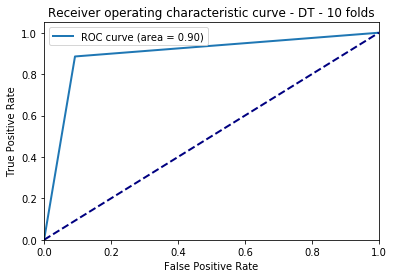

In [0]:
xtrain, xtest = scale_data(X_train, X_test)

model = LinearSVC(C=1e-06, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)
model = model.fit(xtrain, Y_train)
pred_Y=model.predict(xtest)
sum(pred_Y)
plot_roc_curve([Y_test], [pred_Y]) 

In [0]:
f1 = f1_score(Y_test, pred_Y)
auc_score = roc_auc_score(Y_test, pred_Y, average="weighted")
tn, fp, fn, tp = confusion_matrix(Y_test, pred_Y).ravel()
bacc = balanced_accuracy_score(Y_test, pred_Y)
tpr=tp/(tp+fn)
tnr=tn/(fp+tn)
print(f1)
print(auc_score)
print(bacc)
print(tpr)
print(tnr)


0.3153483499214248
0.8964741653707583
0.8964741653707583
0.8852941176470588
0.9076542130944578


In [0]:
# model = LinearSVC(C=1e-06, class_weight=None, dual=True, fit_intercept=True,
#      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
#      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
#      verbose=1)
model = LinearSVC(C=1e-06, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)
model = model.fit(xtrain, Y_train)

In [0]:
pred_Y=model.predict(xtest)

In [0]:
sum(pred_Y)

2870.0

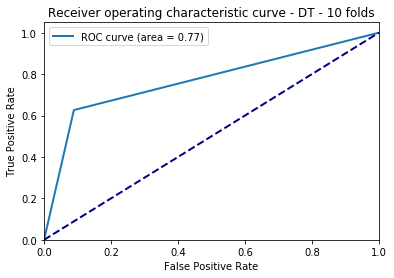

In [0]:
plot_roc_curve([Y_test], [pred_Y]) 

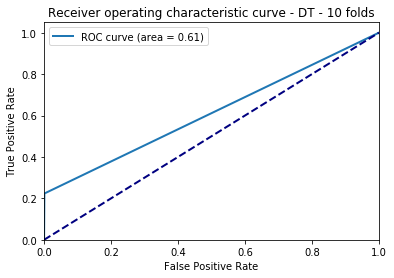

In [0]:
plot_roc_curve([Y_test], [pred_Y]) # unscaled

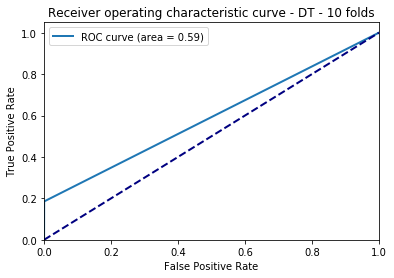

In [0]:
plot_roc_curve(Y_test, pred_Y) # norm max

In [0]:
f1 = f1_score(Y_test, pred_Y)
auc = roc_auc_score(Y_test, pred_Y, average="weighted")
tn, fp, fn, tp = confusion_matrix(Y_test, pred_Y).ravel()
bacc = balanced_accuracy_score(Y_test, pred_Y)
tpr=tp/(tp+fn)
tnr=tn/(fp+tn)
print(f1)
print(auc)
print(bacc)
print(tpr)
print(tnr)


0.26823940585408473
0.8916788760511851
0.8916788760511851
0.9029411764705882
0.8804165756317821


In [0]:
def model_builder_logistic_reg(model, x, y):
  model = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)
  return model.fit(x,y)

### Logistic reg


#### Model eval

In [0]:
def build_log_regr(train, test):
#   model = LogisticRegression(class_weight='balanced', dual=False,
#            fit_intercept=True, intercept_scaling=1.0, max_iter=100,
#            multi_class='warn', n_jobs=None, penalty='l2',
#            random_state=None, solver='sag',
#            tol=0.001, verbose=0)
  model = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False) #0.5358490566037736
  return model.fit(train, test)
  

In [0]:
metrics = []
f1s = []
for i in range(1, 78):
  logregr_results_scaled, (y, pred) = test_results(build_log_regr, scale_data_standard, feature_selection, i, None, data_X, data_Y, "LogRegrStandardSCL2")
  m = logregr_results_scaled.describe()
  metrics.append([m.iloc[1]])
  f1s.append(m.filter(regex="F1").iloc[1])

Fold 0
1
Model fit
Fold 1
1
Model fit
Fold 2
1
Model fit
Fold 3
1
Model fit
Fold 4
1
Model fit
Fold 5
1
Model fit
Fold 6
1
Model fit
Fold 7
1
Model fit
Fold 8
1
Model fit
Fold 9
1
Model fit
Fold 0
2
Model fit
Fold 1
2
Model fit
Fold 2
2
Model fit
Fold 3
2
Model fit
Fold 4
2
Model fit
Fold 5
2
Model fit
Fold 6
2
Model fit
Fold 7
2
Model fit
Fold 8
2
Model fit
Fold 9
2
Model fit
Fold 0
3
Model fit
Fold 1
3
Model fit
Fold 2
3
Model fit
Fold 3
3
Model fit
Fold 4
3
Model fit
Fold 5
3
Model fit
Fold 6
3
Model fit
Fold 7
3
Model fit
Fold 8
3
Model fit
Fold 9
3
Model fit
Fold 0
4
Model fit
Fold 1
4
Model fit
Fold 2
4
Model fit
Fold 3
4
Model fit
Fold 4
4
Model fit
Fold 5
4
Model fit
Fold 6
4
Model fit
Fold 7
4
Model fit
Fold 8
4
Model fit
Fold 9
4
Model fit
Fold 0
5
Model fit
Fold 1
5
Model fit
Fold 2
5
Model fit
Fold 3
5
Model fit
Fold 4
5
Model fit
Fold 5
5
Model fit
Fold 6
5
Model fit
Fold 7
5
Model fit
Fold 8
5
Model fit
Fold 9
5
Model fit
Fold 0
6
Model fit
Fold 1
6
Model fit
Fold 2
6
Mod

In [0]:
metrics

[[LogRegrStandardSCL2_stratified_kfold_F1             0.253972
  LogRegrStandardSCL2_stratified_kfold_AUC            0.582849
  LogRegrStandardSCL2_stratified_kfold_BACC           0.582849
  LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.169180
  LogRegrStandardSCL2_stratified_kfold_TNR            0.996518
  LogRegrStandardSCL2_stratified_kfold_Precision      0.589922
  Name: mean, dtype: float64],
 [LogRegrStandardSCL2_stratified_kfold_F1             0.252842
  LogRegrStandardSCL2_stratified_kfold_AUC            0.582452
  LogRegrStandardSCL2_stratified_kfold_BACC           0.582452
  LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.168393
  LogRegrStandardSCL2_stratified_kfold_TNR            0.996511
  LogRegrStandardSCL2_stratified_kfold_Precision      0.587937
  Name: mean, dtype: float64],
 [LogRegrStandardSCL2_stratified_kfold_F1             0.248965
  LogRegrStandardSCL2_stratified_kfold_AUC            0.580487
  LogRegrStandardSCL2_stratified_kfold_BACC           0.

In [0]:
f1s

[LogRegrStandardSCL2_stratified_kfold_F1    0.253972
 Name: mean, dtype: float64,
 LogRegrStandardSCL2_stratified_kfold_F1    0.252842
 Name: mean, dtype: float64,
 LogRegrStandardSCL2_stratified_kfold_F1    0.248965
 Name: mean, dtype: float64,
 LogRegrStandardSCL2_stratified_kfold_F1    0.249256
 Name: mean, dtype: float64,
 LogRegrStandardSCL2_stratified_kfold_F1    0.249608
 Name: mean, dtype: float64,
 LogRegrStandardSCL2_stratified_kfold_F1    0.249608
 Name: mean, dtype: float64,
 LogRegrStandardSCL2_stratified_kfold_F1    0.249903
 Name: mean, dtype: float64,
 LogRegrStandardSCL2_stratified_kfold_F1    0.253483
 Name: mean, dtype: float64,
 LogRegrStandardSCL2_stratified_kfold_F1    0.25543
 Name: mean, dtype: float64,
 LogRegrStandardSCL2_stratified_kfold_F1    0.255561
 Name: mean, dtype: float64,
 LogRegrStandardSCL2_stratified_kfold_F1    0.25557
 Name: mean, dtype: float64,
 LogRegrStandardSCL2_stratified_kfold_F1    0.256082
 Name: mean, dtype: float64,
 LogRegrStandardSC

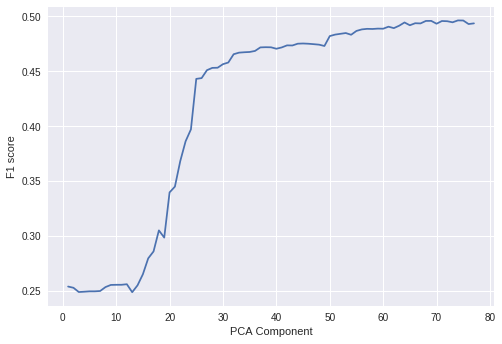

In [0]:
plt.figure()
plt.plot(range(1,78), f1s)
plt.xlabel("PCA Component")
plt.ylabel("F1 score")
plt.savefig(PATH_PREFIX+"PCA_comp")
plt.show()


In [0]:
# f1s_list = [f1s[i].values[0] for i in range(len(f1s))]
f1s_list.index(max(f1s_list))

73

In [0]:
logregr_results_scaled, (y, pred) = test_results(build_log_regr, scale_data_standard, feature_selection, 37, None, data_X, data_Y, "LogRegrStandardSCL2")

Fold 0
37
Model fit
Fold 1
37
Model fit
Fold 2
37
Model fit
Fold 3
37
Model fit
Fold 4
37
Model fit
Fold 5
37
Model fit
Fold 6
37
Model fit
Fold 7
37
Model fit
Fold 8
37
Model fit
Fold 9
37
Model fit


In [0]:
logregr_results_scaled.describe().filter(regex="F1").iloc[1]# standard+pca37 (17,77)

LogRegrStandardSCL2_stratified_kfold_F1    0.47148
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # standard+pca37 (17,77)

LogRegrStandardSCL2_stratified_kfold_F1             0.471480
LogRegrStandardSCL2_stratified_kfold_AUC            0.675265
LogRegrStandardSCL2_stratified_kfold_BACC           0.675265
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.354414
LogRegrStandardSCL2_stratified_kfold_TNR            0.996117
LogRegrStandardSCL2_stratified_kfold_Precision      0.716623
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # standard+pca36

LogRegrStandardSCL2_stratified_kfold_F1             0.468251
LogRegrStandardSCL2_stratified_kfold_AUC            0.673427
LogRegrStandardSCL2_stratified_kfold_BACC           0.673427
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.350678
LogRegrStandardSCL2_stratified_kfold_TNR            0.996175
LogRegrStandardSCL2_stratified_kfold_Precision      0.717544
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # standard+pca35

LogRegrStandardSCL2_stratified_kfold_F1             0.467354
LogRegrStandardSCL2_stratified_kfold_AUC            0.672725
LogRegrStandardSCL2_stratified_kfold_BACC           0.672725
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.349239
LogRegrStandardSCL2_stratified_kfold_TNR            0.996212
LogRegrStandardSCL2_stratified_kfold_Precision      0.718979
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # standard+pca34 (17,77)

LogRegrStandardSCL2_stratified_kfold_F1             0.467162
LogRegrStandardSCL2_stratified_kfold_AUC            0.672669
LogRegrStandardSCL2_stratified_kfold_BACC           0.672669
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.349141
LogRegrStandardSCL2_stratified_kfold_TNR            0.996197
LogRegrStandardSCL2_stratified_kfold_Precision      0.718135
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # robust

LogRegrStandardSCL2_stratified_kfold_F1             0.459168
LogRegrStandardSCL2_stratified_kfold_AUC            0.669467
LogRegrStandardSCL2_stratified_kfold_BACC           0.669467
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.342897
LogRegrStandardSCL2_stratified_kfold_TNR            0.996038
LogRegrStandardSCL2_stratified_kfold_Precision      0.704928
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # standard+pca0.98

LogRegrStandardSCL2_stratified_kfold_F1             0.345233
LogRegrStandardSCL2_stratified_kfold_AUC            0.619723
LogRegrStandardSCL2_stratified_kfold_BACC           0.619723
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.243548
LogRegrStandardSCL2_stratified_kfold_TNR            0.995899
LogRegrStandardSCL2_stratified_kfold_Precision      0.614315
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # minmax

LogRegrStandardSCL2_stratified_kfold_F1             0.471874
LogRegrStandardSCL2_stratified_kfold_AUC            0.677706
LogRegrStandardSCL2_stratified_kfold_BACC           0.677706
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.359748
LogRegrStandardSCL2_stratified_kfold_TNR            0.995664
LogRegrStandardSCL2_stratified_kfold_Precision      0.696080
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # l2+robust

LogRegrStandardSCL2_stratified_kfold_F1             0.320661
LogRegrStandardSCL2_stratified_kfold_AUC            0.599929
LogRegrStandardSCL2_stratified_kfold_BACC           0.599929
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.201244
LogRegrStandardSCL2_stratified_kfold_TNR            0.998614
LogRegrStandardSCL2_stratified_kfold_Precision      0.791825
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # standard+pca0.98 +l2

LogRegrStandardSCL2_stratified_kfold_F1             0.071019
LogRegrStandardSCL2_stratified_kfold_AUC            0.518681
LogRegrStandardSCL2_stratified_kfold_BACC           0.518681
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.038157
LogRegrStandardSCL2_stratified_kfold_TNR            0.999205
LogRegrStandardSCL2_stratified_kfold_Precision      0.578495
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # l2+standard+pca0.98

LogRegrStandardSCL2_stratified_kfold_F1             0.306566
LogRegrStandardSCL2_stratified_kfold_AUC            0.594765
LogRegrStandardSCL2_stratified_kfold_BACC           0.594765
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.190924
LogRegrStandardSCL2_stratified_kfold_TNR            0.998607
LogRegrStandardSCL2_stratified_kfold_Precision      0.783724
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # l2+standard+pca

LogRegrStandardSCL2_stratified_kfold_F1             0.288415
LogRegrStandardSCL2_stratified_kfold_AUC            0.588523
LogRegrStandardSCL2_stratified_kfold_BACC           0.588523
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.178563
LogRegrStandardSCL2_stratified_kfold_TNR            0.998483
LogRegrStandardSCL2_stratified_kfold_Precision      0.755582
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # minmax+pca

LogRegrStandardSCL2_stratified_kfold_F1             0.230267
LogRegrStandardSCL2_stratified_kfold_AUC            0.572407
LogRegrStandardSCL2_stratified_kfold_BACC           0.572407
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.147486
LogRegrStandardSCL2_stratified_kfold_TNR            0.997328
LogRegrStandardSCL2_stratified_kfold_Precision      0.611949
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # l2+minmax+pca

LogRegrStandardSCL2_stratified_kfold_F1             0.192262
LogRegrStandardSCL2_stratified_kfold_AUC            0.555470
LogRegrStandardSCL2_stratified_kfold_BACC           0.555470
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.112296
LogRegrStandardSCL2_stratified_kfold_TNR            0.998643
LogRegrStandardSCL2_stratified_kfold_Precision      0.681794
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # l2 + minmax

LogRegrStandardSCL2_stratified_kfold_F1             0.325011
LogRegrStandardSCL2_stratified_kfold_AUC            0.601436
LogRegrStandardSCL2_stratified_kfold_BACC           0.601436
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.204230
LogRegrStandardSCL2_stratified_kfold_TNR            0.998643
LogRegrStandardSCL2_stratified_kfold_Precision      0.797835
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # l1

LogRegrStandardSCL2_stratified_kfold_F1             0.000484
LogRegrStandardSCL2_stratified_kfold_AUC            0.500082
LogRegrStandardSCL2_stratified_kfold_BACC           0.500082
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.000243
LogRegrStandardSCL2_stratified_kfold_TNR            0.999920
LogRegrStandardSCL2_stratified_kfold_Precision      0.050000
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # l2

LogRegrStandardSCL2_stratified_kfold_F1             0.000485
LogRegrStandardSCL2_stratified_kfold_AUC            0.500118
LogRegrStandardSCL2_stratified_kfold_BACC           0.500118
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.000243
LogRegrStandardSCL2_stratified_kfold_TNR            0.999993
LogRegrStandardSCL2_stratified_kfold_Precision      0.100000
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # standard + l1

LogRegrStandardSCL2_stratified_kfold_F1             0.283033
LogRegrStandardSCL2_stratified_kfold_AUC            0.585363
LogRegrStandardSCL2_stratified_kfold_BACC           0.585363
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.171820
LogRegrStandardSCL2_stratified_kfold_TNR            0.998906
LogRegrStandardSCL2_stratified_kfold_Precision      0.805493
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # standard + l2+ pca 

LogRegrStandardSCL2_stratified_kfold_F1             0.042338
LogRegrStandardSCL2_stratified_kfold_AUC            0.510780
LogRegrStandardSCL2_stratified_kfold_BACC           0.510780
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.022136
LogRegrStandardSCL2_stratified_kfold_TNR            0.999424
LogRegrStandardSCL2_stratified_kfold_Precision      0.530327
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # standard + pca

LogRegrStandardSCL2_stratified_kfold_F1             0.284882
LogRegrStandardSCL2_stratified_kfold_AUC            0.594425
LogRegrStandardSCL2_stratified_kfold_BACC           0.594425
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.192574
LogRegrStandardSCL2_stratified_kfold_TNR            0.996277
LogRegrStandardSCL2_stratified_kfold_Precision      0.589283
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # minmax

LogRegrStandardSCL2_stratified_kfold_F1             0.471874
LogRegrStandardSCL2_stratified_kfold_AUC            0.677706
LogRegrStandardSCL2_stratified_kfold_BACC           0.677706
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.359748
LogRegrStandardSCL2_stratified_kfold_TNR            0.995664
LogRegrStandardSCL2_stratified_kfold_Precision      0.696080
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # minmax + l2

LogRegrStandardSCL2_stratified_kfold_F1             0.302421
LogRegrStandardSCL2_stratified_kfold_AUC            0.599995
LogRegrStandardSCL2_stratified_kfold_BACC           0.599995
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.203237
LogRegrStandardSCL2_stratified_kfold_TNR            0.996752
LogRegrStandardSCL2_stratified_kfold_Precision      0.638359
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # standard + l2

LogRegrStandardSCL2_stratified_kfold_F1             0.335906
LogRegrStandardSCL2_stratified_kfold_AUC            0.606081
LogRegrStandardSCL2_stratified_kfold_BACC           0.606081
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.213665
LogRegrStandardSCL2_stratified_kfold_TNR            0.998497
LogRegrStandardSCL2_stratified_kfold_Precision      0.789593
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # standard

LogRegrStandardSCL2_stratified_kfold_F1             0.493299
LogRegrStandardSCL2_stratified_kfold_AUC            0.684882
LogRegrStandardSCL2_stratified_kfold_BACC           0.684882
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.373457
LogRegrStandardSCL2_stratified_kfold_TNR            0.996307
LogRegrStandardSCL2_stratified_kfold_Precision      0.735563
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # robust + l2

LogRegrStandardSCL2_stratified_kfold_F1             0.156832
LogRegrStandardSCL2_stratified_kfold_AUC            0.543806
LogRegrStandardSCL2_stratified_kfold_BACC           0.543806
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.088655
LogRegrStandardSCL2_stratified_kfold_TNR            0.998957
LogRegrStandardSCL2_stratified_kfold_Precision      0.693087
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1] # robust

LogRegrStandardSCL2_stratified_kfold_F1             0.471874
LogRegrStandardSCL2_stratified_kfold_AUC            0.677706
LogRegrStandardSCL2_stratified_kfold_BACC           0.677706
LogRegrStandardSCL2_stratified_kfold_TPR(recall)    0.359748
LogRegrStandardSCL2_stratified_kfold_TNR            0.995664
LogRegrStandardSCL2_stratified_kfold_Precision      0.696080
Name: mean, dtype: float64

In [0]:
logregr_results_scaled, (y, pred) = test_results(build_log_regr, scale_data_standard, None, data_X, data_Y, "LogRegrStandardSC") # standard scaler

Fold 0
Model fit
Fold 1
Model fit
Fold 2
Model fit
Fold 3
Model fit
Fold 4
Model fit
Fold 5
Model fit
Fold 6
Model fit
Fold 7
Model fit
Fold 8
Model fit
Fold 9
Model fit


In [0]:
logregr_results_scaled.describe().iloc[1]

LogRegrStandardSC_stratified_kfold_F1             0.362396
LogRegrStandardSC_stratified_kfold_AUC            0.898921
LogRegrStandardSC_stratified_kfold_BACC           0.898921
LogRegrStandardSC_stratified_kfold_TPR(recall)    0.875967
LogRegrStandardSC_stratified_kfold_TNR            0.921876
LogRegrStandardSC_stratified_kfold_Precision      0.228524
Name: mean, dtype: float64

In [0]:
logregr_results_scaled, (y, pred) = test_results(build_log_regr, scale_data_standard, feature_selection, data_X, data_Y, "LogRegr") # standard scaler + pca

Fold 0
Model fit
Fold 1
Model fit
Fold 2
Model fit
Fold 3
Model fit
Fold 4
Model fit
Fold 5
Model fit
Fold 6
Model fit
Fold 7
Model fit
Fold 8
Model fit
Fold 9
Model fit


In [0]:
logregr_results_scaled.describe().iloc[1]

LogRegr_stratified_kfold_F1             0.321033
LogRegr_stratified_kfold_AUC            0.886282
LogRegr_stratified_kfold_BACC           0.886282
LogRegr_stratified_kfold_TPR(recall)    0.865866
LogRegr_stratified_kfold_TNR            0.906698
LogRegr_stratified_kfold_Precision      0.197122
Name: mean, dtype: float64

In [0]:
logregr_results_scaled, (y, pred) = test_results(build_log_regr, scale_data_minmax, feature_selection, data_X, data_Y, "LogRegr") # minmax scaler + pca

Fold 0
Model fit
Fold 1
Model fit
Fold 2
Model fit
Fold 3
Model fit
Fold 4
Model fit
Fold 5
Model fit
Fold 6
Model fit
Fold 7
Model fit
Fold 8
Model fit
Fold 9
Model fit


In [0]:
logregr_results_scaled.describe().iloc[1]

LogRegr_stratified_kfold_F1             0.062416
LogRegr_stratified_kfold_AUC            0.601836
LogRegr_stratified_kfold_BACC           0.601836
LogRegr_stratified_kfold_TPR(recall)    0.982732
LogRegr_stratified_kfold_TNR            0.220940
LogRegr_stratified_kfold_Precision      0.032239
Name: mean, dtype: float64

In [0]:
logregr_results_scaled.describe().iloc[1]

LogRegr_stratified_kfold_F1             0.062214
LogRegr_stratified_kfold_AUC            0.600075
LogRegr_stratified_kfold_BACC           0.600075
LogRegr_stratified_kfold_TPR(recall)    0.978061
LogRegr_stratified_kfold_TNR            0.222089
LogRegr_stratified_kfold_Precision      0.032136
Name: mean, dtype: float64

In [0]:
print([sum(p) for p in pred])
print([sum(yy) for yy in y])

[11149.0, 10632.0, 11216.0, 10857.0, 11051.0, 10992.0, 11104.0, 11191.0, 11127.0, 10863.0]
[406.0, 358.0, 360.0, 289.0, 363.0, 364.0, 357.0, 411.0, 341.0, 371.0]


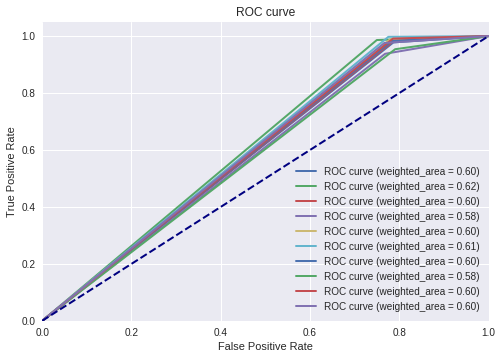

In [0]:
plot_roc_curve(y, pred)

#### Model selection

In [0]:
from sklearn.linear_model import LogisticRegressionCV
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=1)
X_train, X_test = scale_data(X_train, X_test) #minmax
# X_train, X_test = feature_selection(X_train, X_test)
grid = {
    'cv': [10],
    'Cs':[10, 12, 14, 16],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol':[1e-3, 1e-4, 1e-5],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced'],
}
paramGrid = ParameterGrid(grid)
bestModel3, bestScore3, allModels3, allScores3 = pf.bestFit(LogisticRegressionCV, paramGrid,
           X_train, Y_train, X_test, Y_test, 
           metric = f1_score,
           greater_is_better=True,
           scoreLabel = "F1")
print(bestModel3, bestScore3)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 56.2min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 56.2min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed: 56.2min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 56.2min


KeyboardInterrupt: ignored

In [0]:
from sklearn.linear_model import LogisticRegressionCV
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=1)
X_train, X_test = scale_data(X_train, X_test)
X_train, X_test = feature_selection(X_train, X_test)
grid = {
    'cv': [10],
    'Cs':[10, 12, 14, 16],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol':[1e-3, 1e-4, 1e-5],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced'],
}
paramGrid = ParameterGrid(grid)
bestModel2, bestScore2, allModels2, allScores2 = pf.bestFit(LogisticRegressionCV, paramGrid,
           X_train, Y_train, X_test, Y_test, 
           metric = f1_score,
           greater_is_better=True,
           scoreLabel = "F1")
print(bestModel2, bestScore2)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 48.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 64.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 95.7min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 110.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 129.9min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 171.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 201.3min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 251.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 277.4min finished
[Parallel(n_jobs=-1)]: Using backend Loky

-------------SCORING MODELS-------------
Too many dimensions to plot.
LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='sag',
           tol=0.001, verbose=0) 0.3088120613465038


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.5s finished


## Tree-based

In [0]:
kfold = KFold(10, True, 1)
stratified_kfold = KFold(10, True, 1)

#### Extra tree classifier

In [0]:
def buildET(X,Y,dt_criterion="gini", dt_class_weight=None):
  clf = tree.ExtraTreeClassifier(criterion=dt_criterion, class_weight=dt_class_weight)
  return clf.fit(train_X, train_Y)

In [0]:
results = pd.DataFrame(index=range(10))
criteria = ["gini", "entropy"]
class_weights=["balanced"]
col_name = "%s_stratified_kfold_denorm_%s_%s"
for criterion in criteria:
  for class_weight in class_weights:
    f1s, w_aucs, bacc, tpr, tnr = [], [], [], [], []
    for train_idx, test_idx in stratified_kfold.split(data_X):
      train_X = data_X.iloc[train_idx]
      test_X = data_X.iloc[test_idx]
      train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
      clf = buildET(train_X, train_Y, dt_criterion=criterion, dt_class_weight=class_weight)
      pred_Y = clf.predict(test_X)
      f1s.append(f1_score(test_Y, pred_Y))
      w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
      tn, fp, fn, tp = confusion_matrix(test_Y, pred_Y).ravel()
      bacc.append(balanced_accuracy_score(test_Y, pred_Y))
      tpr.append(tp/(tp+fn))
      tnr.append(tn/(fp+tn))
    print(f'{criterion}')
    f1_df = pd.DataFrame({col_name % ("F1", criterion, str(class_weight)): f1s})
    auc_df = pd.DataFrame({col_name % ("AUC", criterion, str(class_weight)): w_aucs})
    bacc_df = pd.DataFrame({col_name % ("BACC", criterion, str(class_weight)): bacc})
    tpr_df = pd.DataFrame({col_name % ("TPR", criterion, str(class_weight)): tpr})
    tnr_df = pd.DataFrame({col_name % ("TNR", criterion, str(class_weight)): tnr})
    results = pd.concat([results, f1_df, auc_df, bacc_df, tpr_df, tnr_df], axis=1)


gini
entropy


In [0]:
results.describe().iloc[1]

F1_stratified_kfold_denorm_gini_balanced         0.426125
AUC_stratified_kfold_denorm_gini_balanced        0.697188
BACC_stratified_kfold_denorm_gini_balanced       0.697188
TPR_stratified_kfold_denorm_gini_balanced        0.407639
TNR_stratified_kfold_denorm_gini_balanced        0.986737
F1_stratified_kfold_denorm_entropy_balanced      0.416215
AUC_stratified_kfold_denorm_entropy_balanced     0.698602
BACC_stratified_kfold_denorm_entropy_balanced    0.698602
TPR_stratified_kfold_denorm_entropy_balanced     0.412114
TNR_stratified_kfold_denorm_entropy_balanced     0.985090
Name: mean, dtype: float64

#### Decision tree classifier

##### Normalized data

In [0]:
f1s = []
w_aucs = []
for train_idx, test_idx in kfold.split(data_X):
  train_X = normalize(data_X.iloc[train_idx], axis=0, norm='max')
  test_X = normalize(data_X.iloc[test_idx], axis=0, norm='max')
  train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(train_X, train_Y)
  pred_Y = clf.predict(test_X)
  f1s.append(f1_score(test_Y, pred_Y))
  w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
  print(f'Fold {len(f1s)}')


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


In [0]:
strat_f1s = []
strat_w_aucs = []
for train_idx, test_idx in stratified_kfold.split(data_X):
  train_X = normalize(data_X.iloc[train_idx], axis=0, norm='max')
  test_X = normalize(data_X.iloc[test_idx], axis=0, norm='max')
  train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(train_X, train_Y)
  pred_Y = clf.predict(test_X)
  strat_f1s.append(f1_score(test_Y, pred_Y))
  strat_w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
  print(f'Fold {len(f1s)}')


Fold 10
Fold 10
Fold 10
Fold 10
Fold 10
Fold 10
Fold 10
Fold 10
Fold 10
Fold 10


In [0]:
print(pd.DataFrame(pd.concat([pd.DataFrame({"F1":f1s}),pd.DataFrame({"Strat F1":strat_f1s})], axis=1)))
print(pd.DataFrame(pd.concat([pd.DataFrame({"w_AUC":w_aucs}),pd.DataFrame({"Strat w_auc":strat_w_aucs})], axis=1)))

         F1  Strat F1
0  0.195397  0.184303
1  0.212994  0.224354
2  0.193211  0.170330
3  0.251185  0.249800
4  0.212000  0.243012
5  0.181729  0.168999
6  0.225198  0.207916
7  0.225502  0.235702
8  0.365874  0.348485
9  0.285714  0.303585
      w_AUC  Strat w_auc
0  0.773348     0.750088
1  0.693776     0.688433
2  0.740431     0.695476
3  0.696530     0.692815
4  0.743157     0.753593
5  0.720147     0.690503
6  0.723814     0.690914
7  0.709674     0.725858
8  0.760986     0.766432
9  0.731688     0.732518


##### denormalized data

In [0]:
f1s = []
w_aucs = []
for train_idx, test_idx in kfold.split(data_X):
  train_X = data_X.iloc[train_idx]
  test_X = data_X.iloc[test_idx]
  train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
  clf = tree.DecisionTreeClassifier(criterion="entropy", class_weight="balanced")
  clf = clf.fit(train_X, train_Y)
  pred_Y = clf.predict(test_X)
  f1s.append(f1_score(test_Y, pred_Y))
  w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
  print(f'Fold {len(f1s)}')


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


In [0]:
strat_f1s = []
strat_w_aucs = []
for train_idx, test_idx in stratified_kfold.split(data_X):
  train_X = data_X.iloc[train_idx]
  test_X = data_X.iloc[test_idx]
  train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
  clf = tree.DecisionTreeClassifier(criterion="entropy", class_weight="balanced")
  clf = clf.fit(train_X, train_Y)
  pred_Y = clf.predict(test_X)
  strat_f1s.append(f1_score(test_Y, pred_Y))
  strat_w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
  print(f'Fold {len(strat_f1s)}')


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


In [0]:
print(pd.DataFrame(pd.concat([pd.DataFrame({"F1":f1s}),pd.DataFrame({"Strat F1":strat_f1s})], axis=1)))
print(pd.DataFrame(pd.concat([pd.DataFrame({"w_AUC":w_aucs}),pd.DataFrame({"Strat w_auc":strat_w_aucs})], axis=1)))

         F1  Strat F1
0  0.423803  0.416787
1  0.506849  0.519444
2  0.423756  0.414977
3  0.469444  0.455307
4  0.425287  0.434659
5  0.455090  0.447407
6  0.468244  0.476904
7  0.436997  0.446837
8  0.442455  0.458599
9  0.478947  0.478203
      w_AUC  Strat w_auc
0  0.710956     0.707816
1  0.760091     0.763419
2  0.701876     0.702836
3  0.730883     0.722360
4  0.699236     0.706091
5  0.719638     0.717859
6  0.719694     0.723501
7  0.706533     0.710689
8  0.711683     0.720712
9  0.729892     0.728663


#### Run multiple experiments

In [0]:
def buildDT(X,Y,dt_criterion="gini", dt_class_weight=None):
  clf = tree.DecisionTreeClassifier(criterion=dt_criterion, class_weight=dt_class_weight)
  return clf.fit(train_X, train_Y)

##### roc curve

In [0]:
data_Y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: BUZZ, dtype: float64

In [0]:
results = pd.DataFrame(index=range(10))
criteria = ["entropy"]
class_weights=["balanced"]
col_name = "%s_stratified_kfold_denorm_%s_%s"
fpr = dict()
tpr = dict()
roc_auc = dict()
for criterion in criteria:
  for class_weight in class_weights:
    f1s, w_aucs, bacc, tprr, tnr = [], [], [], [], []
    i = 0
    for train_idx, test_idx in stratified_kfold.split(data_X):
      train_X = data_X.iloc[train_idx]
      test_X = data_X.iloc[test_idx]
      train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
      clf = buildDT(train_X, train_Y, dt_criterion=criterion, dt_class_weight=class_weight)
      pred_Y = clf.predict_proba(test_X)
      fpr[i], tpr[i], _ = roc_curve(test_Y, pred_Y[:,1])
      roc_auc[i] = auc(fpr[i], tpr[i])
      i+=1
      print(i)
      
#       f1s.append(f1_score(test_Y, np.asarray(pred_Y).round()))
#       w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
#       tn, fp, fn, tp = confusion_matrix(test_Y, np.asarray(pred_Y).round()).ravel()
#       bacc.append(balanced_accuracy_score(test_Y, np.asarray(pred_Y).round()))
#       tprr.append(tp/(tp+fn))
#       tnr.append(tn/(fp+tn))
    print(f'{criterion}')
#     f1_df = pd.DataFrame({col_name % ("F1", criterion, str(class_weight)): f1s})
#     auc_df = pd.DataFrame({col_name % ("AUC", criterion, str(class_weight)): w_aucs})
#     bacc_df = pd.DataFrame({col_name % ("BACC", criterion, str(class_weight)): bacc})
#     tpr_df = pd.DataFrame({col_name % ("TPR", criterion, str(class_weight)): tprr})
#     tnr_df = pd.DataFrame({col_name % ("TNR", criterion, str(class_weight)): tnr})
#     results = pd.concat([results, f1_df, auc_df, bacc_df, tpr_df, tnr_df], axis=1)

1
2
3
4
5
6
7
8
9
10
entropy


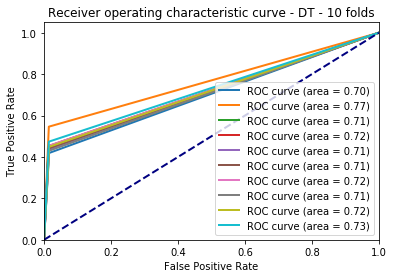

In [0]:
plt.figure()
for i in range(10):
  plt.plot(fpr[i], tpr[i],
           lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve - DT - 10 folds')
plt.legend()
plt.show()

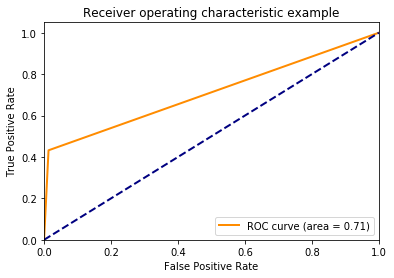

In [0]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

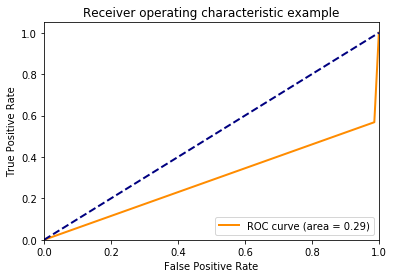

In [0]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [0]:
results.describe().iloc[1]

F1_stratified_kfold_denorm_gini_balanced         0.428504
AUC_stratified_kfold_denorm_gini_balanced        0.701759
BACC_stratified_kfold_denorm_gini_balanced       0.701759
TPR_stratified_kfold_denorm_gini_balanced        0.417451
TNR_stratified_kfold_denorm_gini_balanced        0.986067
F1_stratified_kfold_denorm_entropy_balanced      0.452506
AUC_stratified_kfold_denorm_entropy_balanced     0.719067
BACC_stratified_kfold_denorm_entropy_balanced    0.719067
TPR_stratified_kfold_denorm_entropy_balanced     0.452475
TNR_stratified_kfold_denorm_entropy_balanced     0.985658
Name: mean, dtype: float64

##### Denormalized results

In [0]:
criteria = ["gini"]#, "entropy"]
class_weights=["balanced"]
col_name = "%s_stratified_kfold_denorm_%s_%s"
for criterion in criteria:
  for class_weight in class_weights:
    f1s, w_aucs, bacc, tpr, tnr = [], [], [], [], []
    for train_idx, test_idx in stratified_kfold.split(data_X):
      print(len(tnr))
      train_X = data_X.iloc[train_idx]
      test_X = data_X.iloc[test_idx]
      train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
      clf = buildDT(train_X, train_Y, dt_criterion=criterion, dt_class_weight=class_weight)
      pred_Y = clf.predict(test_X)
      f1s.append(f1_score(test_Y, pred_Y))
      w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
      tn, fp, fn, tp = confusion_matrix(test_Y, pred_Y).ravel()
      bacc.append(balanced_accuracy_score(test_Y, pred_Y))
      tpr.append(tp/(tp+fn))
      tnr.append(tn/(fp+tn))
    print(f'{criterion}')
    f1_df = pd.DataFrame({col_name % ("F1", criterion, str(class_weight)): f1s})
    auc_df = pd.DataFrame({col_name % ("AUC", criterion, str(class_weight)): w_aucs})
    bacc_df = pd.DataFrame({col_name % ("BACC", criterion, str(class_weight)): bacc})
    tpr_df = pd.DataFrame({col_name % ("TPR", criterion, str(class_weight)): tpr})
    tnr_df = pd.DataFrame({col_name % ("TNR", criterion, str(class_weight)): tnr})
    results = pd.concat([results, f1_df, auc_df, bacc_df, tpr_df, tnr_df], axis=1)


0
1
2
3
4
5
6
7
8
9
gini


In [0]:
results

,F1_stratified_kfold_denorm_gini_balanced,AUC_stratified_kfold_denorm_gini_balanced,BACC_stratified_kfold_denorm_gini_balanced,TPR_stratified_kfold_denorm_gini_balanced,TNR_stratified_kfold_denorm_gini_balanced,F1_stratified_kfold_denorm_entropy_balanced,AUC_stratified_kfold_denorm_entropy_balanced,BACC_stratified_kfold_denorm_entropy_balanced,TPR_stratified_kfold_denorm_entropy_balanced,TNR_stratified_kfold_denorm_entropy_balanced
0,0.427935,0.708471,0.708471,0.431138,0.985805,0.418605,0.707925,0.707925,0.431138,0.984713
1,0.460870,0.723029,0.723029,0.459538,0.986521,0.513966,0.759120,0.759120,0.531792,0.986448
2,0.389937,0.688495,0.688495,0.391167,0.985822,0.407643,0.695240,0.695240,0.403785,0.986695
3,0.457300,0.726330,0.726330,0.467606,0.985054,0.472185,0.737488,0.737488,0.490141,0.984835
4,0.422695,0.700337,0.700337,0.415042,0.985633,0.421203,0.697734,0.697734,0.409471,0.985998
5,0.400602,0.690818,0.690818,0.395833,0.985803,0.456036,0.721053,0.721053,0.455357,0.986749
6,0.450633,0.707727,0.707727,0.429952,0.985502,0.462112,0.717132,0.717132,0.449275,0.984989
7,0.421199,0.691405,0.691405,0.396325,0.986485,0.432935,0.706277,0.706277,0.427822,0.984732
8,0.435724,0.697588,0.697588,0.408629,0.986546,0.443286,0.708314,0.708314,0.431472,0.985156
9,0.424411,0.692497,0.692497,0.398438,0.986556,0.484848,0.732605,0.732605,0.479167,0.986044


##### Normalized results

In [0]:
data_X_norm = pd.DataFrame(normalize(data_X, axis=0, norm='l1'))#, pd.DataFrame(normalize(X_test, axis=0, norm='l2'))

In [0]:
data_X_norm.describe()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,0.007116,0.006775,0.008073,0.006547,0.006039,0.007559,0.006502,0.005763,0.004999,0.005142,...,0.003556,0.005997,0.004055,0.007112,0.006772,0.008097,0.006550,0.006042,0.007554,0.006519
std,0.021060,0.020594,0.024170,0.019563,0.018100,0.022102,0.018862,0.015540,0.013887,0.014250,...,0.005172,0.007402,0.006190,0.021025,0.020560,0.024212,0.019552,0.018090,0.022065,0.018889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000124,0.000087,0.000146,0.000111,0.000097,0.000140,0.000133,0.000132,0.000127,0.000122,...,0.003401,0.005386,0.003390,0.000123,0.000087,0.000146,0.000111,0.000097,0.000139,0.000160
50%,0.000909,0.000830,0.000976,0.000815,0.000743,0.000979,0.000880,0.000861,0.000699,0.000793,...,0.003401,0.005386,0.003390,0.000905,0.000827,0.001025,0.000813,0.000741,0.000976,0.000880
75%,0.005163,0.004891,0.005806,0.004665,0.004296,0.005629,0.004959,0.004634,0.004069,0.004088,...,0.003685,0.005925,0.003793,0.005185,0.004917,0.005806,0.004691,0.004319,0.005645,0.004986
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
data_X_norm = pd.DataFrame(normalize(data_X, axis=0, norm='l1'))#, pd.DataFrame(normalize(X_test, axis=0, norm='l2'))

In [0]:
results = pd.DataFrame(index=range(10))
criteria = ["gini", "entropy"]
class_weights=["balanced"]
col_name = "%s_stratified_kfold_norml1_%s_%s"
for criterion in criteria:
  for class_weight in class_weights:
    f1s, w_aucs, bacc, tpr, tnr = [], [], [], [], []
    for train_idx, test_idx in stratified_kfold.split(data_X_norm):
      print(len(f1s))
      train_X = data_X_norm.iloc[train_idx]
      test_X = data_X_norm.iloc[test_idx]
      train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
      clf = buildDT(train_X, train_Y, dt_criterion=criterion, dt_class_weight=class_weight)
      pred_Y = clf.predict(test_X)
      f1s.append(f1_score(test_Y, pred_Y))
      w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
      tn, fp, fn, tp = confusion_matrix(test_Y, pred_Y).ravel()
      bacc.append(balanced_accuracy_score(test_Y, pred_Y))
      tpr.append(tp/(tp+fn))
      tnr.append(tn/(fp+tn))
    print(f'{criterion}')
    f1_df = pd.DataFrame({col_name % ("F1", criterion, str(class_weight)): f1s})
    auc_df = pd.DataFrame({col_name % ("AUC", criterion, str(class_weight)): w_aucs})
    bacc_df = pd.DataFrame({col_name % ("BACC", criterion, str(class_weight)): bacc})
    tpr_df = pd.DataFrame({col_name % ("TPR", criterion, str(class_weight)): tpr})
    tnr_df = pd.DataFrame({col_name % ("TNR", criterion, str(class_weight)): tnr})
    results = pd.concat([results, f1_df, auc_df, bacc_df, tpr_df, tnr_df], axis=1)

0
1
2
3
4
5
6
7
8
9
gini
0
1
2
3
4
5
6
7
8
9
entropy


In [0]:
results.describe().iloc[1]

F1_stratified_kfold_norml1_gini_balanced         0.423648
AUC_stratified_kfold_norml1_gini_balanced        0.698122
BACC_stratified_kfold_norml1_gini_balanced       0.698122
TPR_stratified_kfold_norml1_gini_balanced        0.410061
TNR_stratified_kfold_norml1_gini_balanced        0.986184
F1_stratified_kfold_norml1_entropy_balanced      0.446607
AUC_stratified_kfold_norml1_entropy_balanced     0.713138
BACC_stratified_kfold_norml1_entropy_balanced    0.713138
TPR_stratified_kfold_norml1_entropy_balanced     0.440261
TNR_stratified_kfold_norml1_entropy_balanced     0.986016
Name: mean, dtype: float64

In [0]:
results.filter(regex="stratified_kfold_denorm_en").describe().iloc[1]

F1_stratified_kfold_denorm_entropy_balanced      0.456540
AUC_stratified_kfold_denorm_entropy_balanced     0.721000
BACC_stratified_kfold_denorm_entropy_balanced    0.721000
TPR_stratified_kfold_denorm_entropy_balanced     0.456233
TNR_stratified_kfold_denorm_entropy_balanced     0.985767
Name: mean, dtype: float64

In [0]:
results.describe().iloc[1].to_csv(PATH_PREFIX + "DT_results_5metrics")

In [0]:
res.to_csv(PATH_PREFIX + "DT_results_str-kfold_denorm")

In [0]:
r.to_csv(PATH_PREFIX + "DT_results_str-kfold_norm")

In [0]:
res = pd.DataFrame()
criteria = ["gini", "entropy"]
class_weights=["balanced"]
col_name = "%s_str-kfold_denorm_%s_%s"
for criterion in criteria:
  for class_weight in class_weights:
    f1s, w_aucs = [], []
    for train_idx, test_idx in stratified_kfold.split(data_X):
      train_X = data_X.iloc[train_idx]
      test_X = data_X.iloc[test_idx]
      train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
      clf = buildDT(train_X, train_Y, dt_criterion=criterion, dt_class_weight=class_weight)
      pred_Y = clf.predict(test_X)
      f1s.append(f1_score(test_Y, pred_Y))
      w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
      print(f'Fold {len(f1s)}')
    f1_df = pd.DataFrame({col_name % ("F1", criterion, str(class_weight)): f1s})
    auc_df = pd.DataFrame({col_name % ("WAUC", criterion, str(class_weight)): w_aucs})
    res = pd.concat([res, f1_df, auc_df], axis=1)


In [0]:
r = pd.DataFrame()
criteria = ["gini", "entropy"]
class_weights=["balanced"]
col_name = "%s_str-kfold_norm_%s_%s"
for criterion in criteria:
  for class_weight in class_weights:
    f1s, w_aucs = [], []
    for train_idx, test_idx in stratified_kfold.split(data_X):
      train_X = normalize(data_X.iloc[train_idx], axis=0, norm='max')
      test_X = normalize(data_X.iloc[test_idx], axis=0, norm='max')
      train_Y, test_Y = data_Y.iloc[train_idx], data_Y.iloc[test_idx]
      clf = buildDT(train_X, train_Y, dt_criterion=criterion, dt_class_weight=class_weight)
      pred_Y = clf.predict(test_X)
      f1s.append(f1_score(test_Y, pred_Y))
      w_aucs.append(roc_auc_score(test_Y, pred_Y, average="weighted"))
      print(f'Fold {len(f1s)}')
    f1_df = pd.DataFrame({col_name % ("F1", criterion, str(class_weight)): f1s})
    auc_df = pd.DataFrame({col_name % ("WAUC", criterion, str(class_weight)): w_aucs})
    r = pd.concat([r, f1_df, auc_df], axis=1)

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


#### Evaluation

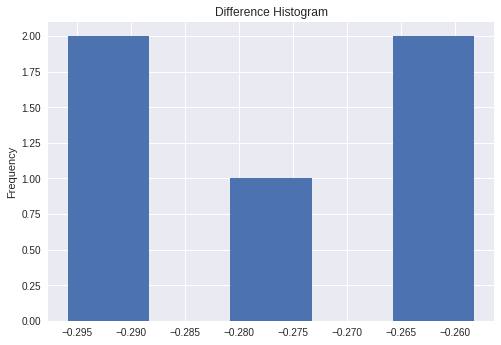

In [0]:
(results["F1_kfold_denorm_gini_None"]-results["WAUC_kfold_denorm_gini_None"]).plot(kind='hist', title= 'Difference Histogram')

In [0]:
clf.score(X_test, Y_test) 

0.9710752611754673

In [0]:
# from sklearn.model_selection import cross_val_score

In [0]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [0]:
Y_pred = clf.predict(X_test)

In [0]:
f1 = f1_score(Y_test, Y_pred)
f1_macro = f1_score(Y_test, Y_pred, average='macro')
f1_micro = f1_score(Y_test, Y_pred, average='micro')
f1_weighted = f1_score(Y_test, Y_pred, average='weighted')


print(f"""F1 score: {f1}
F1 macro: {f1_macro}
F1 micro: {f1_micro}
F1 weighted: {f1_weighted}""")
# auc_score = auc(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
w_auc = roc_auc_score(Y_test, Y_pred, average="weighted")
auc = roc_auc_score(Y_test, Y_pred)

w_acc = balanced_accuracy_score(Y_test, Y_pred)
print(f"""
Accuracy: {acc}
confusion_matrix: {cm}
Precision: {prec}
Recall: {rec}
Weighted auc: {w_auc}
Auc: {auc}
Weighted acc: {w_acc}""")

F1 score: 0.45387205387205387
F1 macro: 0.7195362568672301
F1 micro: 0.9711818634070073
F1 weighted: 0.9723618799436571

Accuracy: 0.9711818634070073
confusion_matrix: [[26994   468]
 [  343   337]]
Precision: 0.4186335403726708
Recall: 0.49558823529411766
Weighted auc: 0.7392732524515159
Auc: 0.7392732524515159
Weighted acc: 0.7392732524515159


## Distance-based

### KneighborsClassifier

#### sel

In [0]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=1)
X_train, X_test = scale_data(X_train, X_test)
X_train, X_test = feature_selection(X_train, X_test)
grid = {
    'n_neighbors': [1,3,5],
    'weights': ['distance'],
    'algorithm': ['kd_tree'],
    'p': [1,2,3,4,5]
}
res = {}
name = "%s_%s_%s_%s"
for n in grid['n_neighbors']:
    for w in grid['weights']:
        for algo in grid['algorithm']:
            for p in grid['p']:
                model = KNeighborsClassifier(n_neighbors=n, weights=w, algorithm=algo, p=p)
                model.fit(X_train, Y_train)
                f1= f1_score(Y_test, model.predict(X_test))
                model_name = name % (str(n), w, algo, str(p))
                print(model_name,f1)
                res[model_name] = f1
print(res)

1_uniform_auto_1 0.30612244897959184
1_uniform_auto_2 0.3044733044733045
1_uniform_ball_tree_1 0.30612244897959184
1_uniform_ball_tree_2 0.3044733044733045
1_uniform_kd_tree_1 0.30612244897959184
1_uniform_kd_tree_2 0.3044733044733045
1_uniform_brute_1 0.30612244897959184
1_uniform_brute_2 0.3044733044733045
1_distance_auto_1 0.30612244897959184
1_distance_auto_2 0.3044733044733045
1_distance_ball_tree_1 0.30612244897959184
1_distance_ball_tree_2 0.3044733044733045
1_distance_kd_tree_1 0.30612244897959184
1_distance_kd_tree_2 0.3044733044733045
1_distance_brute_1 0.30612244897959184
1_distance_brute_2 0.3044733044733045
3_uniform_auto_1 0.3148854961832061
3_uniform_auto_2 0.3208453410182517
3_uniform_ball_tree_1 0.3148854961832061
3_uniform_ball_tree_2 0.3208453410182517
3_uniform_kd_tree_1 0.3148854961832061
3_uniform_kd_tree_2 0.3208453410182517
3_uniform_brute_1 0.3148854961832061
3_uniform_brute_2 0.3208453410182517
3_distance_auto_1 0.3104421448730009
3_distance_auto_2 0.323251417

KeyboardInterrupt: ignored

In [0]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=1)
X_train, X_test = scale_data(X_train, X_test)
X_train, X_test = feature_selection(X_train, X_test)
grid = {
    'n_neighbors': [1,3,5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2,3,5]
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(KNeighborsClassifier, paramGrid,
           X_train, Y_train, X_test, Y_test, 
           metric = f1_score,
           greater_is_better=True,
           scoreLabel = "F1")
print(bestModel, bestScore)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

-------------SCORING MODELS-------------


BrokenProcessPool: ignored

In [0]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=1)
X_train, X_test = scale_data(X_train, X_test)
# X_train, X_test = feature_selection(X_train, X_test)
grid = {
    'n_neighbors': [1,3,5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2,3,5]
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(KNeighborsClassifier, paramGrid,
           X_train, Y_train, X_test, Y_test, 
           metric = f1_score,
           greater_is_better=True,
           scoreLabel = "F1")
print(bestModel, bestScore)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 31.8min
exception calling callback for <Future at 0x7fae25d6b080

TerminatedWorkerError: ignored

In [0]:
from sklearn.neighbors import KNeighborsClassifier
# X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=1)
# X_train, X_test = scale_data(X_train, X_test)
X_train, X_test = feature_selection(X_train, X_test)
grid = {
    'n_neighbors': [1,3,5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2,3,5]
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(KNeighborsClassifier, paramGrid,
           X_train, Y_train, X_test, Y_test, 
           metric = f1_score,
           greater_is_better=True,
           scoreLabel = "F1")
print(bestModel, bestScore)

#### eval

In [0]:
def build_knn(train, test):
  model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='kd_tree', p=1)
  return model.fit(train, test)

In [14]:
knn_results_scaled, (y, pred) = test_results(build_knn, scale_data_standard, None,None,'l2',  data_X, data_Y, "KNN_Standard_L2")

Fold 0
Model fit
Fold 1
Model fit
Fold 2
Model fit
Fold 3
Model fit
Fold 4
Model fit
Fold 5
Model fit
Fold 6
Model fit
Fold 7
Model fit
Fold 8
Model fit
Fold 9
Model fit


In [15]:
knn_results_scaled

,KNN_Standard_L2_stratified_kfold_F1,KNN_Standard_L2_stratified_kfold_AUC,KNN_Standard_L2_stratified_kfold_BACC,KNN_Standard_L2_stratified_kfold_TPR(recall),KNN_Standard_L2_stratified_kfold_TNR,KNN_Standard_L2_stratified_kfold_Precision
0,0.428360,0.673961,0.673961,0.357143,0.990779,0.535055
1,0.426073,0.682156,0.682156,0.374302,0.990009,0.494465
2,0.409600,0.672782,0.672782,0.355556,0.990008,0.483019
3,0.446565,0.698141,0.698141,0.404844,0.991438,0.497872
4,0.363636,0.646700,0.646700,0.303030,0.990371,0.454545
5,0.397415,0.664141,0.664141,0.337912,0.990370,0.482353
6,0.421405,0.672278,0.672278,0.352941,0.991614,0.522822
7,0.434911,0.674513,0.674513,0.357664,0.991361,0.554717
8,0.416974,0.662484,0.662484,0.331378,0.993590,0.562189
9,0.458136,0.691147,0.691147,0.390836,0.991459,0.553435


In [16]:
knn_results_scaled.describe()

,KNN_Standard_L2_stratified_kfold_F1,KNN_Standard_L2_stratified_kfold_AUC,KNN_Standard_L2_stratified_kfold_BACC,KNN_Standard_L2_stratified_kfold_TPR(recall),KNN_Standard_L2_stratified_kfold_TNR,KNN_Standard_L2_stratified_kfold_Precision
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.420308,0.673830,0.673830,0.356561,0.991100,0.514047
std,0.026446,0.014617,0.014617,0.029219,0.001071,0.036809
min,0.363636,0.646700,0.646700,0.303030,0.990008,0.454545
25%,0.411444,0.666175,0.666175,0.341669,0.990370,0.485880
50%,0.423739,0.673371,0.673371,0.356349,0.991070,0.510347
75%,0.433274,0.680245,0.680245,0.370142,0.991454,0.548840
max,0.458136,0.698141,0.698141,0.404844,0.993590,0.562189


In [17]:
knn_results_scaled.describe().iloc[1]

KNN_Standard_L2_stratified_kfold_F1             0.420308
KNN_Standard_L2_stratified_kfold_AUC            0.673830
KNN_Standard_L2_stratified_kfold_BACC           0.673830
KNN_Standard_L2_stratified_kfold_TPR(recall)    0.356561
KNN_Standard_L2_stratified_kfold_TNR            0.991100
KNN_Standard_L2_stratified_kfold_Precision      0.514047
Name: mean, dtype: float64

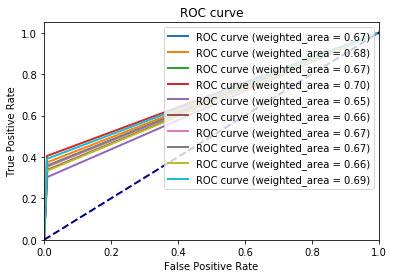

In [18]:
plot_roc_curve(y,pred)

In [0]:
knn_results_scaled, (y, pred) = test_results(build_knn, scale_data_standard, None,'l1',  data_X, data_Y, "KNN_Standard_L1")

Fold 0
Model fit
Fold 1
Model fit
Fold 2
Model fit
Fold 3
Model fit
Fold 4
Model fit
Fold 5
Model fit
Fold 6
Model fit
Fold 7
Model fit
Fold 8
Model fit
Fold 9
Model fit


In [0]:
knn_results_scaled.describe().iloc[1]

KNN_Standard_L1_stratified_kfold_F1             0.550322
KNN_Standard_L1_stratified_kfold_AUC            0.727907
KNN_Standard_L1_stratified_kfold_BACC           0.727907
KNN_Standard_L1_stratified_kfold_TPR(recall)    0.461468
KNN_Standard_L1_stratified_kfold_TNR            0.994346
KNN_Standard_L1_stratified_kfold_Precision      0.682488
Name: mean, dtype: float64

## Rule-based

In [0]:
# import numpy as np
# from Orange.data import Table, Domain, ContinuousVariable, DiscreteVariable


# def series2descriptor(d):
#     if d.dtype is np.dtype("float") or d.dtype is np.dtype("int"):
#         return ContinuousVariable(str(d.name))
#     else:
#       t = d.unique()
#       t.sort()
#       return DiscreteVariable(str(d.name), list(t.astype("str")))

# def df2domain(df):
#     featurelist = [series2descriptor(df.iloc[:,col]) for col in range(len(df.columns)-1)]
#     return Domain(featurelist, class_vars = DiscreteVariable("BUZZ", ["0","1"]))

# def df2table(df):
#     tdomain = df2domain(df)
# #     tdomain =  Orange.data.Domain((Orange.data.DiscreteVariable(name) for name in data.columns))
#     ttables = [series2table(df.iloc[:,i], tdomain[i]) for i in range(len(df.columns)-1)]
#     ttables.append(series2table(map(string, df.iloc[:,len(df.columns)-1])))
#     ttables = np.array(ttables).reshape((len(df.columns),-1)).transpose()
#     return Table(tdomain , ttables)

# def series2table(series, variable):
#     if series.dtype is np.dtype("int") or series.dtype is np.dtype("float"):
#         series = series.values[:, np.newaxis]
#         return Table(series)
#     else:
#         series = series.astype('category').cat.codes.reshape((-1,1))
#         return Table(series)

In [0]:
import numpy as np
from Orange.data import Table, Domain, ContinuousVariable, DiscreteVariable


def series2descriptor(d):
    if d.dtype is np.dtype("float") or d.dtype is np.dtype("int"):
        return ContinuousVariable(str(d.name))
    else:
      t = d.unique()
      t.sort()
      return DiscreteVariable(str(d.name), list(t.astype("str")))

def df2domain(df):
    featurelist = [series2descriptor(df.iloc[:,col]) for col in range(len(df.columns)-1)]
    return Domain(featurelist, class_vars = DiscreteVariable("BUZZ", ["0","1"]))

def df2table(df):
    tdomain = df2domain(df)
#     tdomain =  Orange.data.Domain((Orange.data.DiscreteVariable(name) for name in data.columns))
    ttables = [series2table(df.iloc[:,i], tdomain[i]) for i in range(len(df.columns))]
    ttables = np.array(ttables).reshape((len(df.columns),-1)).transpose()
    return Table(tdomain , ttables)

def series2table(series, variable):
    if series.dtype is np.dtype("int") or series.dtype is np.dtype("float"):
        series = series.values[:, np.newaxis]
        return Table(series)
    else:
        series = series.astype('category').cat.codes.reshape((-1,1))
        return Table(series)

In [0]:
import Orange

tbl3 = df2table(data)

In [0]:
import Orange

tblsmaller = df2table(subset)

In [0]:
import Orange

tbl_train = df2table(subset_train)
tbl_test = df2table(subset_test)

In [0]:
# from Orange.preprocess import DomainDiscretizer
# discretizer = DomainDiscretizer()
# domain = Orange.data.Domain([Orange.data.DiscreteVariable(name) for name in data.columns])
# print(dir(tbl))
# print(tbl)


# tbl = Orange.data.Table(data.as_matrix())
# tbl = discretizer(tbl)
# print(tbl.class_var)
# tbl = Orange.data.Table.from_file(PATH_PREFIX + "data/Twitter-Relative-Sigma-500_rule.txt")
# learner = Orange.classification.rules.CN2Learner()
print("learner")

learner = Orange.classification.CN2UnorderedLearner()

# learner = Orange.classification.CN2SDLearner()
# learner = Orange.classification.CN2SDUnorderedLearner()
# consider up to 10 solution streams at one time
learner.rule_finder.search_algorithm.beam_width = 10

# continuous value space is constrained to reduce computation time
learner.rule_finder.search_strategy.constrain_continuous = True

# found rules must cover at least 15 examples
learner.rule_finder.general_validator.min_covered_examples = 25

# found rules may combine at most 2 selectors (conditions)
learner.rule_finder.general_validator.max_rule_length = 50
print("learning")

clss = learner(Table(tbl_train))
print("learnt")

# learner.rule_finder.complexity_evaluator = Orange.classification.rules.WeightedRelativeAccuracyEvaluator#LaplaceAccuracyEvaluator
# learner.rule_finder.significance_validator = Orange.classification.rules.GuardianValidator
print("learner")
# classifier = learner(tbl)
# learner.fit(tbl)
# Cross validating results
# res = Orange.evaluation.testing.CrossValidation(Table(tbl2[:100]), [learner], k=10)

learner
learning
learnt
learner


In [0]:
res = Orange.evaluation.testing.CrossValidation(tbl_test, [clss], k=10)

In [0]:
print(dir(clss))
clss.rule_list

['Probs', 'Value', 'ValueProbs', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_repr_pretty_', '_reprable_fields', '_reprable_items', '_reprable_module', '_reprable_omit_param', 'domain', 'name', 'ordered_predict', 'original_data', 'original_domain', 'predict', 'predict_storage', 'rule_list', 'supports_multiclass', 'supports_weights', 'unordered_predict', 'used_vals']


In [0]:

res = Orange.evaluation.testing.CrossValidation(tbltest, [clss], k=10)

In [0]:
#CN2UnorderedLearner
print(np.shape(res.predicted[0]))
scores(y_tst, res.predicted[0]) # auc 0.5027922523048336
print(roc_auc_score(y_tst, res.predicted[0], average="weighted"))

(1408,)
0.0
0.0
0.5
0.0
0.0
1.0
0.5582628580440397


In [0]:
res.predicts

In [0]:
results = Orange.evaluation.testing.Results()
results.models = [clss]
results.data = Table(tbl2[100:150])
# results.fit(Table(tbl2[:100]), Table(tbl2[100:150]))
Orange.evaluation.AUC(results)

In [0]:
clss = Orange.classification.rules.CN2Learner(tbl2)

In [0]:
clss.fit(tbl2.X,tbl2.Y)

In [0]:
dir(clss)

In [0]:
for r in clss.rule_list:
    print(r)

IF NCD_5<=76.0 AND BL_6>=0.9977879999999999 THEN BUZZ=0 
IF NCD_6<=425.0 AND AI_0<=58.0 AND ADL_5>=1.0037040000000002 THEN BUZZ=0 
IF NAC_6<=425.0 AND AS(NA)_1<=0.00021 AND BL_5>=0.994764 AND AS(NAC)_5>=4.1e-05 THEN BUZZ=0 
IF BL_6<=0.980282 AND BL_5>=0.9931270000000001 THEN BUZZ=0 
IF NAC_6<=815.0 AND BL_5<=0.9929819999999999 AND BL_1>=0.9285709999999999 THEN BUZZ=0 
IF NA_6<=377.0 AND NA_1>=238.0 AND AI_0>=28.0 THEN BUZZ=0 
IF AS(NAC)_6<=0.00057 AND NA_2<=92.0 AND NCD_6>=101.0 THEN BUZZ=0 
IF NAC_6<=948.0 AND AI_1>=333.0 THEN BUZZ=0 
IF NAC_6<=815.0 AND AI_0>=188.0 AND NAC_3>=334.0 AND NCD_4>=157.0 THEN BUZZ=0 
IF NAC_6<=425.0 AND AS(NA)_3<=0.00037400000000000004 AND AS(NA)_1>=0.000242 THEN BUZZ=0 
IF AS(NAC)_6<=0.00057 AND AS(NAC)_5<=0.00015900000000000002 AND AS(NAC)_6>=0.00011599999999999999 THEN BUZZ=0 
IF AI_6<=312.0 AND BL_3<=0.996132 AND BL_0>=0.9959180000000001 THEN BUZZ=0 
IF BL_2<=0.9939530000000001 AND AT_0>=1.228956 AND AI_0>=68.0 THEN BUZZ=0 
IF NAC_6<=1208.0 AND NAC_3<=

In [0]:
#CN2Learner
scores(data_Y, res.predicted[0]) # auc 0.5027922523048336
print(roc_auc_score(data_Y, res.predicted[0], average="weighted"))

In [0]:
dir(learner)

In [0]:
dir(learner.rule_finder)

In [0]:
#CN2Learner
scores(data_Y, res.predicted[0]) # auc 0.5027922523048336
print(roc_auc_score(data_Y, res.predicted[0], average="weighted"))

0.0
0.0
0.5
0.0
0.0
1.0
0.5027922523048336


In [0]:
#CN2UnorderedLearner
scores(data_Y, res.predicted[0]) # auc 0.5027922523048336
print(roc_auc_score(data_Y, res.predicted[0], average="weighted"))

103507.0
0.05068750175025904
0.5073794378752179
0.75
0.0262301100408668
0.26475887575043583
0.5100998470665099


In [0]:
#CN2SDLearner
scores(data_Y, res.predicted[0]) # auc 0.5027922523048336
print(roc_auc_score(data_Y, res.predicted[0], average="weighted"))

NameError: ignored

In [0]:
#CN2SDUnorderedLearner
scores(data_Y, res.predicted[0]) # auc 0.5027922523048336
print(roc_auc_score(data_Y, res.predicted[0], average="weighted"))

103507.0
0.05068750175025904
0.5073794378752179
0.75
0.0262301100408668
0.26475887575043583
0.5100998470665099


In [0]:

scores(data_Y, res.predicted[0]) # auc 0.5027922523048336
print(roc_auc_score(data_Y, res.predicted[0], average="weighted"))

103507.0
0.05068750175025904
0.5073794378752179
0.75
0.0262301100408668
0.26475887575043583
0.5100998470665099


In [0]:
r1 = Orange.evaluation.testing.CrossValidation(tbl, [learner], k=10)

(140707,)


In [0]:
scores(data_Y, resu.predicted[0]) # auc 0.5027922523048336
print(roc_auc_score(data_Y, resu.predicted[0], average="weighted"))

In [0]:
scores(data_Y, resu.predicted[0]) # auc 0.5027922523048336
print(roc_auc_score(data_Y, resu.predicted[0], average="weighted"))

103507.0
0.05068750175025904
0.5073794378752179
0.75
0.0262301100408668
0.26475887575043583
0.5100998470665099


In [0]:
def scores(test_Y, pred_Y):
  pred_Y = np.asarray(np.clip(pred_Y,0,1)).round()
  print(sum(pred_Y))
  print(f1_score(test_Y, pred_Y))
#   print(roc_auc_score(test_Y, pred_Y, average="weighted"))
  tn, fp, fn, tp = confusion_matrix(test_Y, pred_Y).ravel()
  print(balanced_accuracy_score(test_Y, pred_Y))
  print(tp/(tp+fn))
  print(precision_score(test_Y, pred_Y))  
  print(tn/(fp+tn))
#     assert tpr == recall_score(test_Y, pred_Y)


In [0]:
import Orange
iris = Orange.data.Table('iris')
learner = Orange.classification.CN2UnorderedLearner()

# consider up to 10 solution streams at one time
learner.rule_finder.search_algorithm.beam_width = 10

# continuous value space is constrained to reduce computation time
learner.rule_finder.search_strategy.constrain_continuous = True

# found rules must cover at least 15 examples
learner.rule_finder.general_validator.min_covered_examples = 15

# found rules may combine at most 2 selectors (conditions)
learner.rule_finder.general_validator.max_rule_length = 2

classifier = learner(iris)

# Cross validating results
res = Orange.evaluation.testing.CrossValidation(iris, [learner], k=5)

In [0]:
scores(data_Y, resu.predicted[0]) # auc 0.5027922523048336


In [0]:
res, (y, pred) = test_results(model_builder_fct, scaler, feature_selection, comp, norm, data_X, data_Y, model_name)

In [0]:
data.columns

Index(['NCD_0', 'NCD_1', 'NCD_2', 'NCD_3', 'NCD_4', 'NCD_5', 'NCD_6', 'AI_0',
       'AI_1', 'AI_2', 'AI_3', 'AI_4', 'AI_5', 'AI_6', 'AS(NA)_0', 'AS(NA)_1',
       'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4', 'AS(NA)_5', 'AS(NA)_6', 'BL_0',
       'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'NAC_0', 'NAC_1',
       'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6', 'AS(NAC)_0', 'AS(NAC)_1',
       'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4', 'AS(NAC)_5', 'AS(NAC)_6', 'CS_0',
       'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6', 'AT_0', 'AT_1', 'AT_2',
       'AT_3', 'AT_4', 'AT_5', 'AT_6', 'NA_0', 'NA_1', 'NA_2', 'NA_3', 'NA_4',
       'NA_5', 'NA_6', 'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5',
       'ADL_6', 'NAD_0', 'NAD_1', 'NAD_2', 'NAD_3', 'NAD_4', 'NAD_5', 'NAD_6',
       'BUZZ'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Value('NAD_6', 1694.000)

## Ensemble

In [0]:
X, Y = data_500[data_500.columns[:-1]], data_500[data_500.columns[-1]]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

In [0]:

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=0.2, max_leaf_nodes=None,
            min_impurity_decrease=0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=77, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.3, n_estimators=5, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False) 0.5565565565565566



# BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
#             max_depth=None, max_features=None, max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
#             splitter='best'),
#          bootstrap=True, bootstrap_features=False, max_features=1.0,
#          max_samples=0.3, n_estimators=5, n_jobs=None, oob_score=False,
#          random_state=None, verbose=0, warm_start=False) 0.48144624167459565

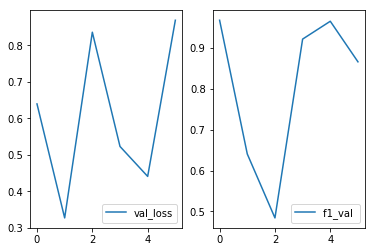

In [0]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(list(range(6)), np.random.random(6), label="val_loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(list(range(6)), np.random.random(6), label="f1_val " )

plt.legend(loc=0)

plt.show();
